# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:11:56.831694: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:12:00.183800
2025-04-14 21:12:00.183800


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:11:54"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

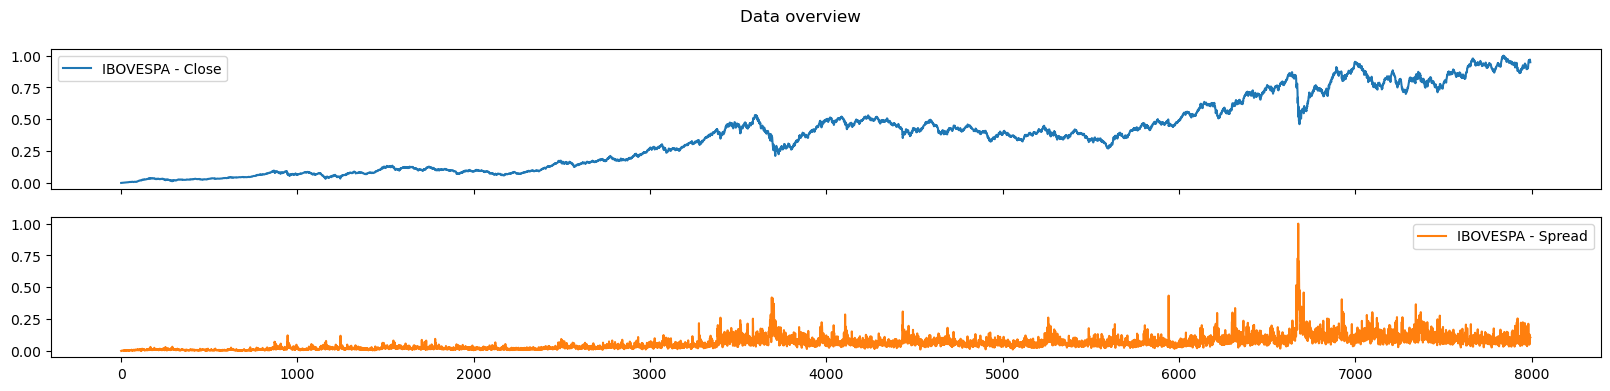

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

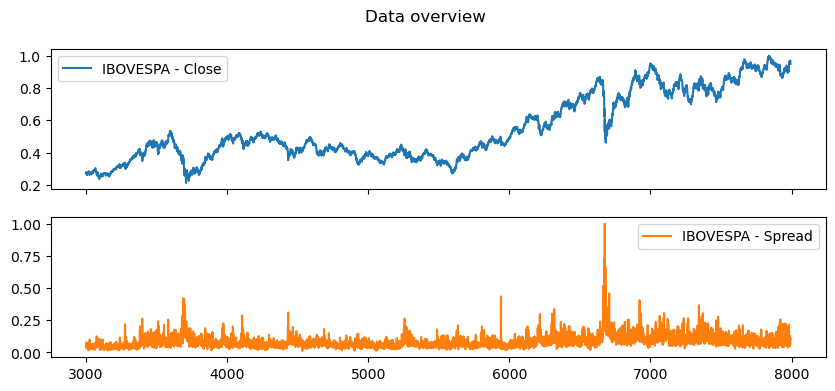

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

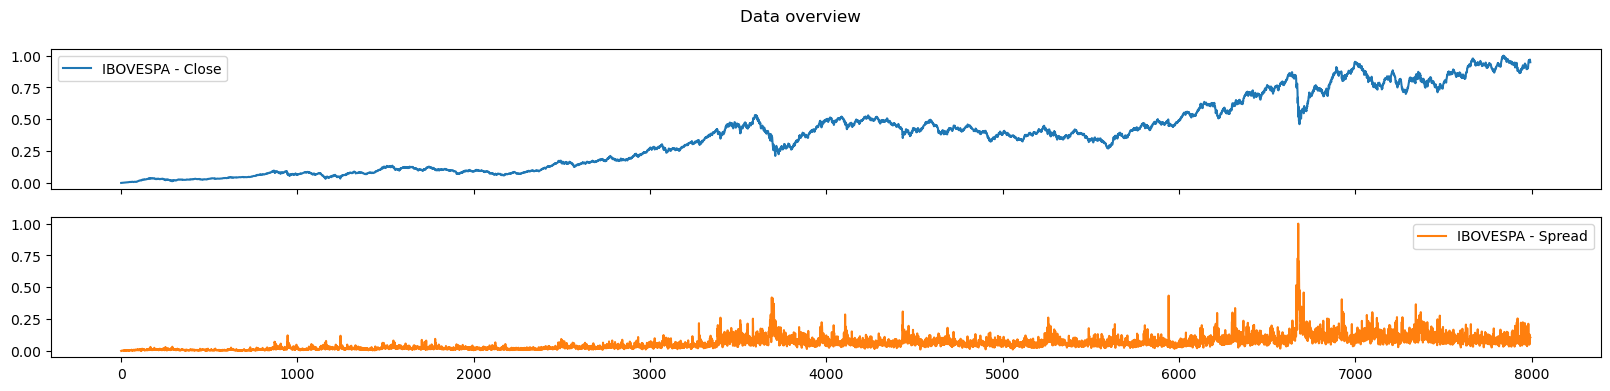

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

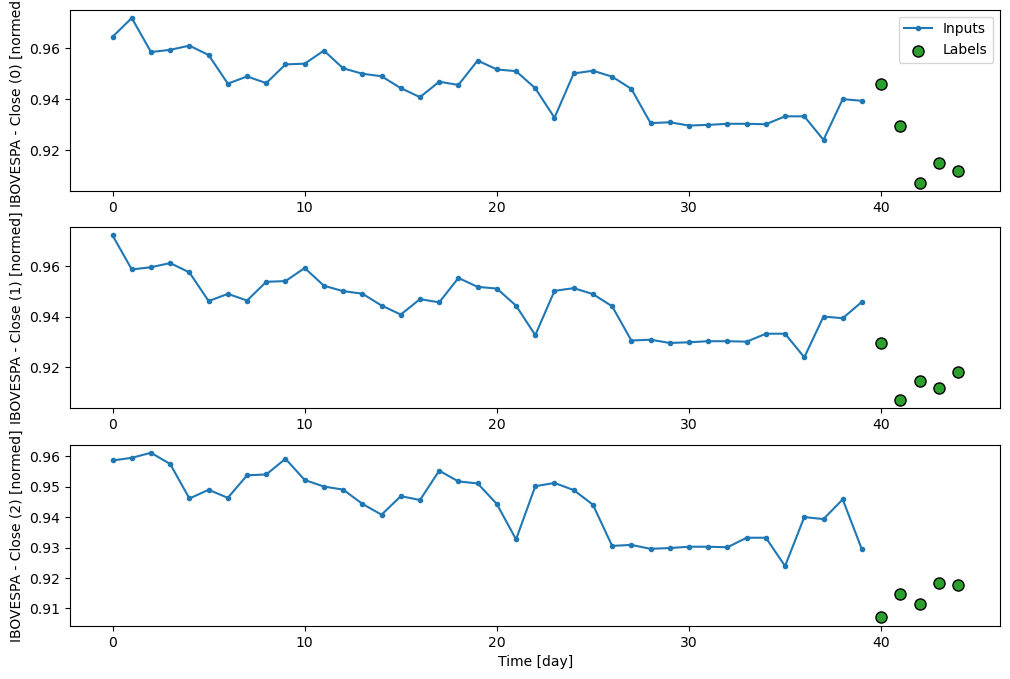

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:07 5s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 69.3091 - mean_squared_error: 4.1957e-05 - root_mean_squared_error: 0.0064  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 63.6875 - mean_squared_error: 1.3102e-04 - root_mean_squared_error: 0.0104

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 57.3004 - mean_squared_error: 1.4707e-04 - root_mean_squared_error: 0.0113

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 53.4237 - mean_squared_error: 1.4955e-04 - root_mean_squared_error: 0.0116

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 50.4587 - mean_squared_error: 1.4728e-04 - root_mean_squared_error: 0.0116

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 47.9372 - mean_squared_error: 1.4310e-04 - root_mean_squared_error: 0.0115

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 45.8467 - mean_squared_error: 1.3864e-04 - root_mean_squared_error: 0.0114

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 43.9166 - mean_squared_error: 1.3383e-04 - root_mean_squared_error: 0.0112

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 42.1428 - mean_squared_error: 1.2908e-04 - root_mean_squared_error: 0.0110

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 40.5248 - mean_squared_error: 1.2454e-04 - root_mean_squared_error: 0.0108

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.0670 - mean_squared_error: 1.2052e-04 - root_mean_squared_error: 0.0106

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 37.8592 - mean_squared_error: 1.1874e-04 - root_mean_squared_error: 0.0106

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 36.8506 - mean_squared_error: 1.2001e-04 - root_mean_squared_error: 0.0107

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 35.9533 - mean_squared_error: 1.2206e-04 - root_mean_squared_error: 0.0108

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.2593 - mean_squared_error: 1.2727e-04 - root_mean_squared_error: 0.0110

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.5950 - mean_squared_error: 1.3162e-04 - root_mean_squared_error: 0.0112

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.9648 - mean_squared_error: 1.3509e-04 - root_mean_squared_error: 0.0113

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 33.4149 - mean_squared_error: 1.3823e-04 - root_mean_squared_error: 0.0115

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.9045 - mean_squared_error: 1.4090e-04 - root_mean_squared_error: 0.0116

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.4348 - mean_squared_error: 1.4349e-04 - root_mean_squared_error: 0.0117

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.9805 - mean_squared_error: 1.4560e-04 - root_mean_squared_error: 0.0118

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5445 - mean_squared_error: 1.4747e-04 - root_mean_squared_error: 0.0119

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.1539 - mean_squared_error: 1.5097e-04 - root_mean_squared_error: 0.0120

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.7805 - mean_squared_error: 1.5452e-04 - root_mean_squared_error: 0.0122

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.4123 - mean_squared_error: 1.5758e-04 - root_mean_squared_error: 0.0123

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 30.0677 - mean_squared_error: 1.6070e-04 - root_mean_squared_error: 0.0124

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 29.7306 - mean_squared_error: 1.6344e-04 - root_mean_squared_error: 0.0125

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 29.3955 - mean_squared_error: 1.6571e-04 - root_mean_squared_error: 0.0126

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 29.0697 - mean_squared_error: 1.6768e-04 - root_mean_squared_error: 0.0127

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 28.7606 - mean_squared_error: 1.6951e-04 - root_mean_squared_error: 0.0128

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 28.4645 - mean_squared_error: 1.7120e-04 - root_mean_squared_error: 0.0128

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 28.1842 - mean_squared_error: 1.7283e-04 - root_mean_squared_error: 0.0129

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 27.9431 - mean_squared_error: 1.7499e-04 - root_mean_squared_error: 0.0130

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 27.7224 - mean_squared_error: 1.7722e-04 - root_mean_squared_error: 0.0131

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 27.5062 - mean_squared_error: 1.7923e-04 - root_mean_squared_error: 0.0131

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 27.3102 - mean_squared_error: 1.8160e-04 - root_mean_squared_error: 0.0132

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 27.1366 - mean_squared_error: 1.8499e-04 - root_mean_squared_error: 0.0133

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 26.9884 - mean_squared_error: 1.9105e-04 - root_mean_squared_error: 0.0135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.8599 - mean_squared_error: 1.9930e-04 - root_mean_squared_error: 0.0138

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 26.7380 - mean_squared_error: 2.0758e-04 - root_mean_squared_error: 0.0140

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 26.6133 - mean_squared_error: 2.1528e-04 - root_mean_squared_error: 0.0142

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.4872 - mean_squared_error: 2.2249e-04 - root_mean_squared_error: 0.0144

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.3612 - mean_squared_error: 2.2936e-04 - root_mean_squared_error: 0.0146

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 26.2367 - mean_squared_error: 2.3598e-04 - root_mean_squared_error: 0.0148

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 26.1134 - mean_squared_error: 2.4247e-04 - root_mean_squared_error: 0.0150

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.9963 - mean_squared_error: 2.4996e-04 - root_mean_squared_error: 0.0152

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 25.8855 - mean_squared_error: 2.5882e-04 - root_mean_squared_error: 0.0154

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.7744 - mean_squared_error: 2.6745e-04 - root_mean_squared_error: 0.0156

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.6628 - mean_squared_error: 2.7569e-04 - root_mean_squared_error: 0.0158

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 25.5518 - mean_squared_error: 2.8383e-04 - root_mean_squared_error: 0.0160

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 25.4398 - mean_squared_error: 2.9160e-04 - root_mean_squared_error: 0.0162

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 25.3271 - mean_squared_error: 2.9912e-04 - root_mean_squared_error: 0.0164

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 25.2148 - mean_squared_error: 3.0682e-04 - root_mean_squared_error: 0.0166

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 25.1045 - mean_squared_error: 3.1538e-04 - root_mean_squared_error: 0.0168

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 24.9933 - mean_squared_error: 3.2355e-04 - root_mean_squared_error: 0.0170

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 24.8828 - mean_squared_error: 3.3201e-04 - root_mean_squared_error: 0.0172

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 24.7800 - mean_squared_error: 3.4356e-04 - root_mean_squared_error: 0.0175

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 24.6866 - mean_squared_error: 3.5809e-04 - root_mean_squared_error: 0.0178

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 24.5942 - mean_squared_error: 3.7237e-04 - root_mean_squared_error: 0.0180

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 24.5082 - mean_squared_error: 3.8975e-04 - root_mean_squared_error: 0.0184

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 24.4309 - mean_squared_error: 4.1463e-04 - root_mean_squared_error: 0.0188

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 24.3633 - mean_squared_error: 4.5219e-04 - root_mean_squared_error: 0.0193

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 24.3044 - mean_squared_error: 5.0096e-04 - root_mean_squared_error: 0.0199

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 24.2509 - mean_squared_error: 5.5451e-04 - root_mean_squared_error: 0.0206

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 24.2246 - mean_squared_error: 5.8110e-04 - root_mean_squared_error: 0.0209

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 24.1991 - mean_squared_error: 6.0835e-04 - root_mean_squared_error: 0.0213

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 24.1479 - mean_squared_error: 6.6180e-04 - root_mean_squared_error: 0.0219

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 24.0948 - mean_squared_error: 7.1296e-04 - root_mean_squared_error: 0.0226

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 24.0400 - mean_squared_error: 7.6194e-04 - root_mean_squared_error: 0.0232

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 24.0128 - mean_squared_error: 7.8594e-04 - root_mean_squared_error: 0.0234

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 23.9584 - mean_squared_error: 8.3280e-04 - root_mean_squared_error: 0.0240

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 23.9031 - mean_squared_error: 8.7790e-04 - root_mean_squared_error: 0.0246

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 23.8481 - mean_squared_error: 9.2202e-04 - root_mean_squared_error: 0.0251

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 23.7917 - mean_squared_error: 9.6426e-04 - root_mean_squared_error: 0.0256

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 23.7629 - mean_squared_error: 9.8471e-04 - root_mean_squared_error: 0.0259

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 23.7338 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0261    

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 23.6746 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0266

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 23.6152 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0271

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 23.5860 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 23.5278 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 23.4685 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0282

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 23.4082 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 23.3479 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 23.2890 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0294

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 23.2305 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0298

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 23.1713 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 23.1114 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0306

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 23.0517 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 23.0223 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0311

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 22.9652 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 22.9094 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.8531 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.7980 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0324

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.7443 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0327

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 22.6923 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.6412 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 22.5910 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 22.5662 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0338

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 22.5169 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 22.4678 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0344

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 22.4194 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0347

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 22.3717 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 22.3237 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.2755 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 22.2270 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 22.2026 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 22.1535 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 22.1052 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0365

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 22.0606 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 22.0173 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 21.9744 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 21.9317 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 21.8896 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0381

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 21.8481 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 21.8064 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 21.7645 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0390

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 21.7223 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0393

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 21.6802 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0396

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 21.6591 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 21.6165 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0400

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 21.5738 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0403

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 21.5523 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0405

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 21.5309 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0406

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 21.4883 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0409

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 21.4673 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0410 - val_loss: 0.1122 - val_mean_absolute_error: 0.1122 - val_mean_absolute_percentage_error: 11.9235 - val_mean_squared_error: 0.0134 - val_root_mean_squared_error: 0.1158 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.7931 - mean_absolute_error: 0.7931 - mean_absolute_percentage_error: 10656.6748 - mean_squared_error: 0.6290 - root_mean_squared_error: 0.7931

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7933 - mean_absolute_error: 0.7933 - mean_absolute_percentage_error: 8920.1133 - mean_squared_error: 0.6293 - root_mean_squared_error: 0.7933  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7884 - mean_absolute_error: 0.7884 - mean_absolute_percentage_error: 7575.0605 - mean_squared_error: 0.6217 - root_mean_squared_error: 0.7885

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7806 - mean_absolute_error: 0.7806 - mean_absolute_percentage_error: 6709.1543 - mean_squared_error: 0.6099 - root_mean_squared_error: 0.7809

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.7874 - mean_absolute_error: 0.7874 - mean_absolute_percentage_error: 6223.4727 - mean_squared_error: 0.6433 - root_mean_squared_error: 0.7991

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.7960 - mean_absolute_error: 0.7960 - mean_absolute_percentage_error: 6064.7827 - mean_squared_error: 0.6724 - root_mean_squared_error: 0.8159

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7991 - mean_absolute_error: 0.7991 - mean_absolute_percentage_error: 5909.4346 - mean_squared_error: 0.6899 - root_mean_squared_error: 0.8262

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7938 - mean_absolute_error: 0.7938 - mean_absolute_percentage_error: 5608.2886 - mean_squared_error: 0.7029 - root_mean_squared_error: 0.8344 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7792 - mean_absolute_error: 0.7792 - mean_absolute_percentage_error: 5326.2129 - mean_squared_error: 0.6990 - root_mean_squared_error: 0.8326

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7702 - mean_absolute_error: 0.7702 - mean_absolute_percentage_error: 5193.6978 - mean_squared_error: 0.6937 - root_mean_squared_error: 0.8295

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.7607 - mean_absolute_error: 0.7607 - mean_absolute_percentage_error: 5067.5493 - mean_squared_error: 0.6870 - root_mean_squared_error: 0.8255

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.7510 - mean_absolute_error: 0.7510 - mean_absolute_percentage_error: 4947.6621 - mean_squared_error: 0.6794 - root_mean_squared_error: 0.8209

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7411 - mean_absolute_error: 0.7411 - mean_absolute_percentage_error: 4833.1616 - mean_squared_error: 0.6712 - root_mean_squared_error: 0.8158

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.7215 - mean_absolute_error: 0.7215 - mean_absolute_percentage_error: 4620.8047 - mean_squared_error: 0.6539 - root_mean_squared_error: 0.8047 

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.7028 - mean_absolute_error: 0.7028 - mean_absolute_percentage_error: 4428.3550 - mean_squared_error: 0.6364 - root_mean_squared_error: 0.7932

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6846 - mean_absolute_error: 0.6846 - mean_absolute_percentage_error: 4252.3247 - mean_squared_error: 0.6189 - root_mean_squared_error: 0.7814

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6674 - mean_absolute_error: 0.6674 - mean_absolute_percentage_error: 4091.0991 - mean_squared_error: 0.6019 - root_mean_squared_error: 0.7698

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6513 - mean_absolute_error: 0.6513 - mean_absolute_percentage_error: 3943.1345 - mean_squared_error: 0.5856 - root_mean_squared_error: 0.7584

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6360 - mean_absolute_error: 0.6360 - mean_absolute_percentage_error: 3806.9543 - mean_squared_error: 0.5700 - root_mean_squared_error: 0.7473

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6287 - mean_absolute_error: 0.6287 - mean_absolute_percentage_error: 3742.7710 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7419

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6146 - mean_absolute_error: 0.6146 - mean_absolute_percentage_error: 3621.5671 - mean_squared_error: 0.5479 - root_mean_squared_error: 0.7313

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6012 - mean_absolute_error: 0.6012 - mean_absolute_percentage_error: 3509.2803 - mean_squared_error: 0.5341 - root_mean_squared_error: 0.7210

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5884 - mean_absolute_error: 0.5884 - mean_absolute_percentage_error: 3404.8433 - mean_squared_error: 0.5209 - root_mean_squared_error: 0.7111

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.5763 - mean_absolute_error: 0.5763 - mean_absolute_percentage_error: 3307.5239 - mean_squared_error: 0.5084 - root_mean_squared_error: 0.7015

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.5650 - mean_absolute_error: 0.5650 - mean_absolute_percentage_error: 3216.5254 - mean_squared_error: 0.4965 - root_mean_squared_error: 0.6924

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.5541 - mean_absolute_error: 0.5541 - mean_absolute_percentage_error: 3131.1091 - mean_squared_error: 0.4852 - root_mean_squared_error: 0.6835

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5438 - mean_absolute_error: 0.5438 - mean_absolute_percentage_error: 3050.8342 - mean_squared_error: 0.4745 - root_mean_squared_error: 0.6750

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - mean_absolute_percentage_error: 2975.1704 - mean_squared_error: 0.4642 - root_mean_squared_error: 0.6668

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5247 - mean_absolute_error: 0.5247 - mean_absolute_percentage_error: 2903.7168 - mean_squared_error: 0.4545 - root_mean_squared_error: 0.6590

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.5159 - mean_absolute_error: 0.5159 - mean_absolute_percentage_error: 2836.1101 - mean_squared_error: 0.4452 - root_mean_squared_error: 0.6513

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.5073 - mean_absolute_error: 0.5073 - mean_absolute_percentage_error: 2772.0188 - mean_squared_error: 0.4363 - root_mean_squared_error: 0.6440

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.4992 - mean_absolute_error: 0.4992 - mean_absolute_percentage_error: 2711.1941 - mean_squared_error: 0.4278 - root_mean_squared_error: 0.6369

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 2653.3621 - mean_squared_error: 0.4196 - root_mean_squared_error: 0.6300

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 2598.3789 - mean_squared_error: 0.4118 - root_mean_squared_error: 0.6234

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.4766 - mean_absolute_error: 0.4766 - mean_absolute_percentage_error: 2546.0024 - mean_squared_error: 0.4044 - root_mean_squared_error: 0.6170

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 2496.0159 - mean_squared_error: 0.3972 - root_mean_squared_error: 0.6107

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2448.3215 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6047

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2402.7378 - mean_squared_error: 0.3837 - root_mean_squared_error: 0.5989

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 2359.1216 - mean_squared_error: 0.3773 - root_mean_squared_error: 0.5933

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 2317.3142 - mean_squared_error: 0.3712 - root_mean_squared_error: 0.5878

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 2277.1804 - mean_squared_error: 0.3653 - root_mean_squared_error: 0.5824

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4331 - mean_absolute_error: 0.4331 - mean_absolute_percentage_error: 2238.6189 - mean_squared_error: 0.3596 - root_mean_squared_error: 0.5773

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4277 - mean_absolute_error: 0.4277 - mean_absolute_percentage_error: 2201.5225 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5722

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 2165.8035 - mean_squared_error: 0.3488 - root_mean_squared_error: 0.5673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4174 - mean_absolute_error: 0.4174 - mean_absolute_percentage_error: 2131.3865 - mean_squared_error: 0.3436 - root_mean_squared_error: 0.5626

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2098.1968 - mean_squared_error: 0.3387 - root_mean_squared_error: 0.5579

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 2066.1611 - mean_squared_error: 0.3339 - root_mean_squared_error: 0.5534

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4031 - mean_absolute_error: 0.4031 - mean_absolute_percentage_error: 2035.2163 - mean_squared_error: 0.3292 - root_mean_squared_error: 0.5490

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3985 - mean_absolute_error: 0.3985 - mean_absolute_percentage_error: 2005.3066 - mean_squared_error: 0.3247 - root_mean_squared_error: 0.5447

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1976.3750 - mean_squared_error: 0.3203 - root_mean_squared_error: 0.5405

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1948.3732 - mean_squared_error: 0.3161 - root_mean_squared_error: 0.5364

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3856 - mean_absolute_error: 0.3856 - mean_absolute_percentage_error: 1921.2579 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5324

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3815 - mean_absolute_error: 0.3815 - mean_absolute_percentage_error: 1894.9884 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5285

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1869.5233 - mean_squared_error: 0.3041 - root_mean_squared_error: 0.5246

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3737 - mean_absolute_error: 0.3737 - mean_absolute_percentage_error: 1844.8252 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5209

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1820.8569 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5172

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 1797.5841 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5137

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1774.9753 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5102

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1753.0027 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5068

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1731.6375 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5034

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 1710.8540 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.5002

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1690.6343 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.4970

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - mean_absolute_percentage_error: 1670.9545 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.4938

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 1651.7936 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.4908

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1633.1293 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.4878

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1614.9376 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4848

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1597.1997 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4820

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1579.9000 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4792

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1563.0215 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4764

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1546.5472 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4737

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1530.4623 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4711

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1514.7545 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4685

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1499.4086 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4659

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1484.4131 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4634

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1469.7561 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4610

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1455.4252 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4586

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1441.4084 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4562

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1427.6938 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4539

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1414.2711 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4516

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1401.1311 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4494

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1388.2650 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4472

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 1375.6638 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4450

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1363.3201 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4429

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1351.2244 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4407

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1339.3691 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4387

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1327.7463 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4366

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1316.3499 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4346

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1305.1725 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4326

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1294.2091 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4307

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1283.4534 - mean_squared_error: 0.2135 - root_mean_squared_error: 0.4288

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1272.8990 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4269

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1262.5404 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4250

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1252.3718 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4232

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1242.3868 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4214

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1232.5807 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4196

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1222.9484 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4178

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1213.4843 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4161

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1204.1846 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4144

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1195.0444 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4127

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1186.0592 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4110

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1177.2255 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4094

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1168.5398 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4078

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1159.9980 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4062

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1151.5964 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4046

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1143.3312 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4031

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1135.1982 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4015

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1127.1946 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4000

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1119.3177 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3985

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1111.5658 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3971

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1103.9343 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3956

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1096.4207 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3942

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1089.0217 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3928

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1081.7343 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3914

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1074.5557 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3901

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1067.4841 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3887

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1060.5173 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3874

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1053.6528 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3861

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1046.8877 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3848

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1040.2197 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3836

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1033.6475 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3823

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1027.1682 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3811

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1020.7798 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3799

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1014.4921 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3787 - val_loss: 0.1084 - val_mean_absolute_error: 0.1084 - val_mean_absolute_percentage_error: 11.5934 - val_mean_squared_error: 0.0158 - val_root_mean_squared_error: 0.1259 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.9012 - mean_absolute_error: 0.9012 - mean_absolute_percentage_error: 12105.4092 - mean_squared_error: 0.8264 - root_mean_squared_error: 0.9091

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8953 - mean_absolute_error: 0.8953 - mean_absolute_percentage_error: 10098.9287 - mean_squared_error: 0.8170 - root_mean_squared_error: 0.9039 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8720 - mean_absolute_error: 0.8720 - mean_absolute_percentage_error: 8516.0283 - mean_squared_error: 0.7802 - root_mean_squared_error: 0.8828 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8357 - mean_absolute_error: 0.8357 - mean_absolute_percentage_error: 7443.7007 - mean_squared_error: 0.7295 - root_mean_squared_error: 0.8523

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7897 - mean_absolute_error: 0.7897 - mean_absolute_percentage_error: 6656.7065 - mean_squared_error: 0.6752 - root_mean_squared_error: 0.8176

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7461 - mean_absolute_error: 0.7461 - mean_absolute_percentage_error: 6051.0410 - mean_squared_error: 0.6258 - root_mean_squared_error: 0.7845

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7107 - mean_absolute_error: 0.7107 - mean_absolute_percentage_error: 5578.7334 - mean_squared_error: 0.5848 - root_mean_squared_error: 0.7560

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6824 - mean_absolute_error: 0.6824 - mean_absolute_percentage_error: 5201.7202 - mean_squared_error: 0.5510 - root_mean_squared_error: 0.7319

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6578 - mean_absolute_error: 0.6578 - mean_absolute_percentage_error: 4886.4653 - mean_squared_error: 0.5220 - root_mean_squared_error: 0.7107

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6350 - mean_absolute_error: 0.6350 - mean_absolute_percentage_error: 4614.0942 - mean_squared_error: 0.4963 - root_mean_squared_error: 0.6914

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6142 - mean_absolute_error: 0.6142 - mean_absolute_percentage_error: 4376.2485 - mean_squared_error: 0.4733 - root_mean_squared_error: 0.6736

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5952 - mean_absolute_error: 0.5952 - mean_absolute_percentage_error: 4166.3008 - mean_squared_error: 0.4527 - root_mean_squared_error: 0.6573

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5779 - mean_absolute_error: 0.5779 - mean_absolute_percentage_error: 3978.9460 - mean_squared_error: 0.4341 - root_mean_squared_error: 0.6423

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5618 - mean_absolute_error: 0.5618 - mean_absolute_percentage_error: 3810.1597 - mean_squared_error: 0.4173 - root_mean_squared_error: 0.6284

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5470 - mean_absolute_error: 0.5470 - mean_absolute_percentage_error: 3657.3660 - mean_squared_error: 0.4019 - root_mean_squared_error: 0.6155

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5331 - mean_absolute_error: 0.5331 - mean_absolute_percentage_error: 3518.2500 - mean_squared_error: 0.3878 - root_mean_squared_error: 0.6034

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 3390.8940 - mean_squared_error: 0.3748 - root_mean_squared_error: 0.5920

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5078 - mean_absolute_error: 0.5078 - mean_absolute_percentage_error: 3273.9868 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5813

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4963 - mean_absolute_error: 0.4963 - mean_absolute_percentage_error: 3166.3796 - mean_squared_error: 0.3515 - root_mean_squared_error: 0.5712

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - mean_absolute_percentage_error: 3066.7463 - mean_squared_error: 0.3411 - root_mean_squared_error: 0.5617

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4750 - mean_absolute_error: 0.4750 - mean_absolute_percentage_error: 2974.1833 - mean_squared_error: 0.3313 - root_mean_squared_error: 0.5526

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4652 - mean_absolute_error: 0.4652 - mean_absolute_percentage_error: 2887.8743 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5440

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 2807.1433 - mean_squared_error: 0.3136 - root_mean_squared_error: 0.5358

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4471 - mean_absolute_error: 0.4471 - mean_absolute_percentage_error: 2731.4592 - mean_squared_error: 0.3056 - root_mean_squared_error: 0.5279

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 2660.3130 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5205

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 2593.2881 - mean_squared_error: 0.2908 - root_mean_squared_error: 0.5133

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4229 - mean_absolute_error: 0.4229 - mean_absolute_percentage_error: 2530.0381 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5065

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 2470.2476 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5000

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 2413.6155 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.4937

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4018 - mean_absolute_error: 0.4018 - mean_absolute_percentage_error: 2359.8884 - mean_squared_error: 0.2656 - root_mean_squared_error: 0.4877

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 2308.8508 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4819

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3891 - mean_absolute_error: 0.3891 - mean_absolute_percentage_error: 2260.2927 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4763

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 2214.0286 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4709

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3773 - mean_absolute_error: 0.3773 - mean_absolute_percentage_error: 2169.9155 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4657

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 2127.7888 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4607

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - mean_absolute_percentage_error: 2087.5024 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4559

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 2048.9233 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4512

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 2030.2383 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4489

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1994.0043 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4444

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1959.2083 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4401

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1925.7644 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4359

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1893.5978 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4318

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1862.6334 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4279

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1832.7966 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4240

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1804.0254 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4203

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1776.2598 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4167

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1749.4489 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4132

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1723.5369 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4097

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1698.4832 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4064

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1674.2448 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4031

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1650.7797 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4000

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1628.0503 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3969

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1606.0170 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3939

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1584.6464 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3909

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1563.9069 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3881

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1543.7698 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3853

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1524.2079 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3825

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1505.1993 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3799

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1486.7302 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3773

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1468.7699 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3747

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1451.3008 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3722

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1434.3031 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3698

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1417.7527 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3675

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1401.6301 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3652

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1385.9199 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3630

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1370.6063 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3608

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1355.6726 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3587

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1341.1036 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3566

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1326.8843 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3546

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1313.0035 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3526

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1299.4491 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3507

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1286.2074 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3488

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1273.2676 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3469

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1260.6179 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3450

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1248.2478 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3432

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1236.1481 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3415

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1224.3097 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3397

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1212.7247 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3380

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1201.3849 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3363

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1190.2811 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3346

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1179.4055 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3330

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1168.7505 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3314

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1158.3093 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3298

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1148.0762 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3282

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1138.0449 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3267

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1128.2108 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3252

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1118.5673 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3237

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1109.1089 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3222

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1099.8300 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3208

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1090.7260 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3194

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1081.7910 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3180

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1073.0192 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3166

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1064.4060 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3153

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1055.9465 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3139

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1047.6376 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3126

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1039.4745 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3113

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1031.4525 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3100

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1023.5695 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3088

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1019.6791 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3082

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1015.8220 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3075

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1011.9974 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3069

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1004.4449 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3057

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 997.0186 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3045 

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 989.7147 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3034

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 982.5297 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3022

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 975.4606 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3011

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 968.5065 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3000

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 961.6633 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.2989

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 954.9281 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.2978

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 948.2988 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.2967

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 941.7723 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2957

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 935.3455 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.2946

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 929.0176 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2936

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 922.7869 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2926

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 916.6498 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2917

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 910.6035 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2907

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 904.6464 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2898

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 898.7767 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.2888

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 892.9921 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2879

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 887.2903 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2870

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 881.6722 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2861

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 878.8982 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2857 - val_loss: 0.1047 - val_mean_absolute_error: 0.1047 - val_mean_absolute_percentage_error: 11.1462 - val_mean_squared_error: 0.0134 - val_root_mean_squared_error: 0.1157 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - loss: 0.8344 - mean_absolute_error: 0.8344 - mean_absolute_percentage_error: 11215.3711 - mean_squared_error: 0.7002 - root_mean_squared_error: 0.8368

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8119 - mean_absolute_error: 0.8119 - mean_absolute_percentage_error: 9234.0957 - mean_squared_error: 0.6642 - root_mean_squared_error: 0.8148   

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7770 - mean_absolute_error: 0.7770 - mean_absolute_percentage_error: 7727.6045 - mean_squared_error: 0.6139 - root_mean_squared_error: 0.7823

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7331 - mean_absolute_error: 0.7331 - mean_absolute_percentage_error: 6707.4854 - mean_squared_error: 0.5597 - root_mean_squared_error: 0.7447

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6832 - mean_absolute_error: 0.6832 - mean_absolute_percentage_error: 5953.7788 - mean_squared_error: 0.5087 - root_mean_squared_error: 0.7069

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6407 - mean_absolute_error: 0.6407 - mean_absolute_percentage_error: 5386.6738 - mean_squared_error: 0.4665 - root_mean_squared_error: 0.6740

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - mean_absolute_percentage_error: 4954.8789 - mean_squared_error: 0.4337 - root_mean_squared_error: 0.6477

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5846 - mean_absolute_error: 0.5846 - mean_absolute_percentage_error: 4613.8325 - mean_squared_error: 0.4076 - root_mean_squared_error: 0.6264

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5635 - mean_absolute_error: 0.5635 - mean_absolute_percentage_error: 4329.8188 - mean_squared_error: 0.3855 - root_mean_squared_error: 0.6078

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 4084.2920 - mean_squared_error: 0.3658 - root_mean_squared_error: 0.5907

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5255 - mean_absolute_error: 0.5255 - mean_absolute_percentage_error: 3869.9600 - mean_squared_error: 0.3482 - root_mean_squared_error: 0.5750

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5091 - mean_absolute_error: 0.5091 - mean_absolute_percentage_error: 3681.4893 - mean_squared_error: 0.3326 - root_mean_squared_error: 0.5607

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4939 - mean_absolute_error: 0.4939 - mean_absolute_percentage_error: 3513.3936 - mean_squared_error: 0.3185 - root_mean_squared_error: 0.5474

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4799 - mean_absolute_error: 0.4799 - mean_absolute_percentage_error: 3362.0913 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5352

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 3225.0806 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5237

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_absolute_percentage_error: 3100.3433 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5130

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2986.2805 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.5029

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4317 - mean_absolute_error: 0.4317 - mean_absolute_percentage_error: 2881.4958 - mean_squared_error: 0.2642 - root_mean_squared_error: 0.4934

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4213 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 2784.9631 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4845

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4115 - mean_absolute_error: 0.4115 - mean_absolute_percentage_error: 2695.6836 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4760

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4022 - mean_absolute_error: 0.4022 - mean_absolute_percentage_error: 2612.7166 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4680

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 2535.4375 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4604

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 2463.2188 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4532

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 2395.5559 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4463

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 2332.0183 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4398

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 2272.2122 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4335

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3554 - mean_absolute_error: 0.3554 - mean_absolute_percentage_error: 2215.8008 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4275

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 2162.4888 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4218

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 2112.0142 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4163

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 2064.1648 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4110

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 2018.7299 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4060

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1975.5197 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4011

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1934.3820 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3964

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 1895.1793 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3919

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1857.7795 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3875

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1822.0387 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3833

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1787.8416 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3793

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1755.0823 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3753

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1723.6606 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3715

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2880 - mean_absolute_error: 0.2880 - mean_absolute_percentage_error: 1693.4917 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3679

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1664.5027 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3643

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1636.6191 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3608

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1609.7767 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3575

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1583.9133 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3542

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1558.9812 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3511

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1534.9252 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3480

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1511.6974 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3450

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1489.2533 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3421

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1467.5554 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3393

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1446.5658 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3366

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1426.2462 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3339

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1406.5625 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3313

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1387.4827 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3288

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1368.9784 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3263

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1351.0212 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3239

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1333.5861 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3216

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1316.6511 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3193

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1300.2037 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3170

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1284.2279 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3149

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1268.6926 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3128

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1253.5859 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3107

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1238.8900 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3088

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1224.5831 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3069

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1210.6464 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3050

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1197.0691 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3032

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1183.8363 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3015

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1170.9308 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.2998

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1158.3392 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2981

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1146.0493 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2965

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1134.0508 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2949

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1122.3324 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2933

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 1110.8848 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2918

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1099.6995 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2903

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 1088.7671 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2888

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 1078.0768 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2873

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 1067.6211 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2859

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 1057.3914 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2845

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1047.3799 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2831

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 1037.5785 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2817

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 1027.9811 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2804

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1018.5814 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2791

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1009.3730 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2778

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1961 - mean_absolute_error: 0.1961 - mean_absolute_percentage_error: 1000.3508 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2765

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 991.5099 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2752 

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 982.8436 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2740

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 974.3459 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2728

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 966.0118 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2716

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 957.8368 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2704

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 949.8177 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2692

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 941.9495 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2681

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 934.2264 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2670

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 926.6455 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2658

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 919.2020 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2647

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 911.8917 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2637

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 904.7124 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2626

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 897.6600 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2616

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 890.7302 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2605

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 883.9211 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2595

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 877.2291 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2585

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 870.6503 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2576

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 864.1819 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2566

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 857.8206 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2557

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 851.5632 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2547

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 845.4069 - mean_squared_error: 0.0811 - root_mean_squared_error: 0.2538

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 839.3520 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2529

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 833.3943 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2520

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 827.5308 - mean_squared_error: 0.0796 - root_mean_squared_error: 0.2512

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 821.7599 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2503

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 816.0787 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2495

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 810.4846 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2487

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 804.9771 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2479

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 799.5550 - mean_squared_error: 0.0771 - root_mean_squared_error: 0.2471

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 794.2152 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2463

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 788.9549 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2456

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 783.7728 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2448

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 778.6677 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2441

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 773.6378 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2434

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 768.6806 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2427

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 763.7965 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2420

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 761.3849 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2417 - val_loss: 0.0847 - val_mean_absolute_error: 0.0847 - val_mean_absolute_percentage_error: 9.1263 - val_mean_squared_error: 0.0082 - val_root_mean_squared_error: 0.0904 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.9723 - mean_absolute_error: 0.9723 - mean_absolute_percentage_error: 13073.1113 - mean_squared_error: 0.9507 - root_mean_squared_error: 0.9750

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.9774 - mean_absolute_error: 0.9774 - mean_absolute_percentage_error: 10982.0518 - mean_squared_error: 0.9619 - root_mean_squared_error: 0.9808 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.9695 - mean_absolute_error: 0.9695 - mean_absolute_percentage_error: 9324.8838 - mean_squared_error: 0.9485 - root_mean_squared_error: 0.9738 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.9521 - mean_absolute_error: 0.9521 - mean_absolute_percentage_error: 8234.1377 - mean_squared_error: 0.9194 - root_mean_squared_error: 0.9585

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.9263 - mean_absolute_error: 0.9263 - mean_absolute_percentage_error: 7483.9922 - mean_squared_error: 0.8799 - root_mean_squared_error: 0.9368

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8929 - mean_absolute_error: 0.8929 - mean_absolute_percentage_error: 6887.9072 - mean_squared_error: 0.8345 - root_mean_squared_error: 0.9108

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8563 - mean_absolute_error: 0.8563 - mean_absolute_percentage_error: 6388.4062 - mean_squared_error: 0.7888 - root_mean_squared_error: 0.8834

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8214 - mean_absolute_error: 0.8214 - mean_absolute_percentage_error: 5968.9604 - mean_squared_error: 0.7465 - root_mean_squared_error: 0.8572

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7912 - mean_absolute_error: 0.7912 - mean_absolute_percentage_error: 5616.2876 - mean_squared_error: 0.7091 - root_mean_squared_error: 0.8334

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7648 - mean_absolute_error: 0.7648 - mean_absolute_percentage_error: 5314.0811 - mean_squared_error: 0.6762 - root_mean_squared_error: 0.8119

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7409 - mean_absolute_error: 0.7409 - mean_absolute_percentage_error: 5049.3135 - mean_squared_error: 0.6466 - root_mean_squared_error: 0.7922

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 4813.9912 - mean_squared_error: 0.6198 - root_mean_squared_error: 0.7738

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6976 - mean_absolute_error: 0.6976 - mean_absolute_percentage_error: 4602.5044 - mean_squared_error: 0.5952 - root_mean_squared_error: 0.7566

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6779 - mean_absolute_error: 0.6779 - mean_absolute_percentage_error: 4411.1128 - mean_squared_error: 0.5726 - root_mean_squared_error: 0.7405

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6594 - mean_absolute_error: 0.6594 - mean_absolute_percentage_error: 4237.0508 - mean_squared_error: 0.5518 - root_mean_squared_error: 0.7254

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6420 - mean_absolute_error: 0.6420 - mean_absolute_percentage_error: 4078.0952 - mean_squared_error: 0.5326 - root_mean_squared_error: 0.7111

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6256 - mean_absolute_error: 0.6256 - mean_absolute_percentage_error: 3932.2708 - mean_squared_error: 0.5148 - root_mean_squared_error: 0.6976

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6101 - mean_absolute_error: 0.6101 - mean_absolute_percentage_error: 3797.8906 - mean_squared_error: 0.4983 - root_mean_squared_error: 0.6849

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5954 - mean_absolute_error: 0.5954 - mean_absolute_percentage_error: 3673.6201 - mean_squared_error: 0.4829 - root_mean_squared_error: 0.6729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5814 - mean_absolute_error: 0.5814 - mean_absolute_percentage_error: 3558.3958 - mean_squared_error: 0.4686 - root_mean_squared_error: 0.6615

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 3451.1226 - mean_squared_error: 0.4551 - root_mean_squared_error: 0.6506

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5555 - mean_absolute_error: 0.5555 - mean_absolute_percentage_error: 3350.9548 - mean_squared_error: 0.4425 - root_mean_squared_error: 0.6403

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5435 - mean_absolute_error: 0.5435 - mean_absolute_percentage_error: 3257.2134 - mean_squared_error: 0.4307 - root_mean_squared_error: 0.6305

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5320 - mean_absolute_error: 0.5320 - mean_absolute_percentage_error: 3169.2234 - mean_squared_error: 0.4195 - root_mean_squared_error: 0.6211

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_absolute_percentage_error: 3086.4644 - mean_squared_error: 0.4090 - root_mean_squared_error: 0.6122

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5106 - mean_absolute_error: 0.5106 - mean_absolute_percentage_error: 3008.4624 - mean_squared_error: 0.3990 - root_mean_squared_error: 0.6036

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5007 - mean_absolute_error: 0.5007 - mean_absolute_percentage_error: 2934.8025 - mean_squared_error: 0.3896 - root_mean_squared_error: 0.5954

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4911 - mean_absolute_error: 0.4911 - mean_absolute_percentage_error: 2865.1333 - mean_squared_error: 0.3806 - root_mean_squared_error: 0.5876

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4820 - mean_absolute_error: 0.4820 - mean_absolute_percentage_error: 2799.1416 - mean_squared_error: 0.3722 - root_mean_squared_error: 0.5800

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4733 - mean_absolute_error: 0.4733 - mean_absolute_percentage_error: 2736.5227 - mean_squared_error: 0.3641 - root_mean_squared_error: 0.5728

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4650 - mean_absolute_error: 0.4650 - mean_absolute_percentage_error: 2677.0339 - mean_squared_error: 0.3564 - root_mean_squared_error: 0.5658

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4570 - mean_absolute_error: 0.4570 - mean_absolute_percentage_error: 2620.4294 - mean_squared_error: 0.3491 - root_mean_squared_error: 0.5591

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4493 - mean_absolute_error: 0.4493 - mean_absolute_percentage_error: 2566.4849 - mean_squared_error: 0.3421 - root_mean_squared_error: 0.5526

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 2515.0281 - mean_squared_error: 0.3354 - root_mean_squared_error: 0.5464

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4348 - mean_absolute_error: 0.4348 - mean_absolute_percentage_error: 2465.8887 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5404

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4280 - mean_absolute_error: 0.4280 - mean_absolute_percentage_error: 2418.8992 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5346

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 2373.9133 - mean_squared_error: 0.3170 - root_mean_squared_error: 0.5290

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 2330.7979 - mean_squared_error: 0.3114 - root_mean_squared_error: 0.5235

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 2289.4275 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5183

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 2249.6877 - mean_squared_error: 0.3008 - root_mean_squared_error: 0.5132

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 2211.4883 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5083

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2174.7346 - mean_squared_error: 0.2910 - root_mean_squared_error: 0.5035

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 2139.3391 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.4988

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 2105.2227 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.4943

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 2072.3159 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.4899

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2040.5522 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.4856

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 2009.8682 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.4815

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1980.2104 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4775

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3584 - mean_absolute_error: 0.3584 - mean_absolute_percentage_error: 1951.5270 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4735

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1923.7659 - mean_squared_error: 0.2580 - root_mean_squared_error: 0.4697

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1896.8849 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4660

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1870.8381 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4623

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 1845.5834 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4588

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1821.0854 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4553

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1797.3075 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4519

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1774.2174 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4486

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1751.7859 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4454

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1729.9911 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4422

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1708.8120 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4392

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1688.2130 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4362

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1668.1742 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4333

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1648.6735 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4304

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1629.6855 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4277

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1611.1851 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4250

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1593.1556 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4224

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1575.5784 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4198

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1558.4326 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4173

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1541.7017 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4148

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1525.3694 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4124

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1509.4231 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4100

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1493.8472 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4076

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1478.6293 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4053

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1463.7568 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4031

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1449.2166 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4009

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1434.9962 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.3987

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1421.0853 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.3966

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1407.4735 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.3945

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1394.1509 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.3924

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1381.1085 - mean_squared_error: 0.1868 - root_mean_squared_error: 0.3904

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1368.3369 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3884

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1355.8278 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3864

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1343.5729 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3845

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1331.5643 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3826

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1319.7958 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3807

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1308.2583 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3789

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1296.9445 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3771

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1285.8474 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3753

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1274.9613 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3735

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1264.2814 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3718

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1253.8011 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3701

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1243.5138 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3684

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1233.4143 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3668

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1223.4968 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3651

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1213.7560 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3635

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1204.1882 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3619

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 1194.7882 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3604

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1185.5511 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3589

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1176.4738 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3573

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1167.5511 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3559

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1158.7792 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3544

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1150.1539 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3529

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1141.6711 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3515

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1133.3269 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3501

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1125.1174 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3487

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1117.0421 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3474

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1109.0962 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3460

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1101.2758 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3447

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1093.5790 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3434

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1086.0023 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3421

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1078.5421 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3409

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1071.1965 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3396

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1063.9642 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3384

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1056.8414 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3372

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1049.8248 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3360

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1042.9121 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3349

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1036.1014 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3338

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1029.3905 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3326

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1022.7762 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3315

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1016.2595 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3304

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1013.0417 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3299 - val_loss: 0.0670 - val_mean_absolute_error: 0.0670 - val_mean_absolute_percentage_error: 7.2656 - val_mean_squared_error: 0.0054 - val_root_mean_squared_error: 0.0734 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.9942 - mean_absolute_error: 0.9942 - mean_absolute_percentage_error: 13357.5059 - mean_squared_error: 0.9885 - root_mean_squared_error: 0.9942

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 1.0010 - mean_absolute_error: 1.0010 - mean_absolute_percentage_error: 11231.7598 - mean_squared_error: 1.0023 - root_mean_squared_error: 1.0011 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.9959 - mean_absolute_error: 0.9959 - mean_absolute_percentage_error: 9548.0059 - mean_squared_error: 0.9925 - root_mean_squared_error: 0.9962 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.9821 - mean_absolute_error: 0.9821 - mean_absolute_percentage_error: 8446.5381 - mean_squared_error: 0.9673 - root_mean_squared_error: 0.9833

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.9609 - mean_absolute_error: 0.9609 - mean_absolute_percentage_error: 7701.8647 - mean_squared_error: 0.9312 - root_mean_squared_error: 0.9641

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.9323 - mean_absolute_error: 0.9323 - mean_absolute_percentage_error: 7116.1777 - mean_squared_error: 0.8879 - root_mean_squared_error: 0.9401

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8972 - mean_absolute_error: 0.8972 - mean_absolute_percentage_error: 6616.5674 - mean_squared_error: 0.8419 - root_mean_squared_error: 0.9135

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8612 - mean_absolute_error: 0.8612 - mean_absolute_percentage_error: 6187.6445 - mean_squared_error: 0.7978 - root_mean_squared_error: 0.8871

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8289 - mean_absolute_error: 0.8289 - mean_absolute_percentage_error: 5823.6685 - mean_squared_error: 0.7582 - root_mean_squared_error: 0.8626

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8008 - mean_absolute_error: 0.8008 - mean_absolute_percentage_error: 5511.2817 - mean_squared_error: 0.7230 - root_mean_squared_error: 0.8403

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7756 - mean_absolute_error: 0.7756 - mean_absolute_percentage_error: 5238.1870 - mean_squared_error: 0.6915 - root_mean_squared_error: 0.8199

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7520 - mean_absolute_error: 0.7520 - mean_absolute_percentage_error: 4995.0825 - mean_squared_error: 0.6627 - root_mean_squared_error: 0.8008

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7294 - mean_absolute_error: 0.7294 - mean_absolute_percentage_error: 4775.6221 - mean_squared_error: 0.6363 - root_mean_squared_error: 0.7829

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7081 - mean_absolute_error: 0.7081 - mean_absolute_percentage_error: 4576.8247 - mean_squared_error: 0.6119 - root_mean_squared_error: 0.7660

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 4396.3398 - mean_squared_error: 0.5896 - root_mean_squared_error: 0.7502

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 4231.8062 - mean_squared_error: 0.5691 - root_mean_squared_error: 0.7354

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 4080.7480 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7214

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6365 - mean_absolute_error: 0.6365 - mean_absolute_percentage_error: 3941.5525 - mean_squared_error: 0.5324 - root_mean_squared_error: 0.7082

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6211 - mean_absolute_error: 0.6211 - mean_absolute_percentage_error: 3813.0220 - mean_squared_error: 0.5159 - root_mean_squared_error: 0.6958

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6065 - mean_absolute_error: 0.6065 - mean_absolute_percentage_error: 3693.7957 - mean_squared_error: 0.5006 - root_mean_squared_error: 0.6840

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5927 - mean_absolute_error: 0.5927 - mean_absolute_percentage_error: 3582.7888 - mean_squared_error: 0.4862 - root_mean_squared_error: 0.6727

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5795 - mean_absolute_error: 0.5795 - mean_absolute_percentage_error: 3479.1299 - mean_squared_error: 0.4727 - root_mean_squared_error: 0.6621

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5670 - mean_absolute_error: 0.5670 - mean_absolute_percentage_error: 3382.0896 - mean_squared_error: 0.4601 - root_mean_squared_error: 0.6519

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5551 - mean_absolute_error: 0.5551 - mean_absolute_percentage_error: 3290.9980 - mean_squared_error: 0.4482 - root_mean_squared_error: 0.6422

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 3205.2971 - mean_squared_error: 0.4369 - root_mean_squared_error: 0.6329

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 3124.5083 - mean_squared_error: 0.4263 - root_mean_squared_error: 0.6241

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5224 - mean_absolute_error: 0.5224 - mean_absolute_percentage_error: 3048.2148 - mean_squared_error: 0.4162 - root_mean_squared_error: 0.6156

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5125 - mean_absolute_error: 0.5125 - mean_absolute_percentage_error: 2976.0283 - mean_squared_error: 0.4066 - root_mean_squared_error: 0.6075

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5029 - mean_absolute_error: 0.5029 - mean_absolute_percentage_error: 2907.6111 - mean_squared_error: 0.3976 - root_mean_squared_error: 0.5996

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4938 - mean_absolute_error: 0.4938 - mean_absolute_percentage_error: 2842.6758 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.5921

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4850 - mean_absolute_error: 0.4850 - mean_absolute_percentage_error: 2780.9556 - mean_squared_error: 0.3807 - root_mean_squared_error: 0.5849

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4766 - mean_absolute_error: 0.4766 - mean_absolute_percentage_error: 2722.2188 - mean_squared_error: 0.3729 - root_mean_squared_error: 0.5780

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4686 - mean_absolute_error: 0.4686 - mean_absolute_percentage_error: 2666.2424 - mean_squared_error: 0.3654 - root_mean_squared_error: 0.5713

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4608 - mean_absolute_error: 0.4608 - mean_absolute_percentage_error: 2612.8408 - mean_squared_error: 0.3583 - root_mean_squared_error: 0.5648

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 2561.8494 - mean_squared_error: 0.3515 - root_mean_squared_error: 0.5586

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2513.0850 - mean_squared_error: 0.3449 - root_mean_squared_error: 0.5526

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 2466.3879 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5468

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - mean_absolute_percentage_error: 2421.6213 - mean_squared_error: 0.3326 - root_mean_squared_error: 0.5412

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4263 - mean_absolute_error: 0.4263 - mean_absolute_percentage_error: 2378.6562 - mean_squared_error: 0.3268 - root_mean_squared_error: 0.5357

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4201 - mean_absolute_error: 0.4201 - mean_absolute_percentage_error: 2337.3811 - mean_squared_error: 0.3213 - root_mean_squared_error: 0.5304

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 2297.6982 - mean_squared_error: 0.3159 - root_mean_squared_error: 0.5253

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4084 - mean_absolute_error: 0.4084 - mean_absolute_percentage_error: 2259.5115 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5203

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4028 - mean_absolute_error: 0.4028 - mean_absolute_percentage_error: 2222.7310 - mean_squared_error: 0.3058 - root_mean_squared_error: 0.5155

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 2187.2781 - mean_squared_error: 0.3010 - root_mean_squared_error: 0.5108

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 2153.0825 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5063

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2120.0781 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.5019

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 2088.1997 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.4976

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 2057.3845 - mean_squared_error: 0.2834 - root_mean_squared_error: 0.4934

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 2027.5829 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.4893

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1998.7434 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.4853

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 1970.8169 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.4815

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3600 - mean_absolute_error: 0.3600 - mean_absolute_percentage_error: 1943.7589 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4777

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1917.5267 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4740

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1892.0808 - mean_squared_error: 0.2610 - root_mean_squared_error: 0.4705

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 1867.3833 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4670

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1843.4012 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4635

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1820.1033 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4602

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3373 - mean_absolute_error: 0.3373 - mean_absolute_percentage_error: 1797.4647 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4570

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 1775.4628 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4538

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1754.0653 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4507

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1733.2506 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4477

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1712.9956 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4448

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1693.2740 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4419

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1674.0587 - mean_squared_error: 0.2315 - root_mean_squared_error: 0.4391

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1655.3319 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4364

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1637.0767 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4338

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1619.2723 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4312

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1601.8992 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4286

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1584.9399 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4261

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1568.3794 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4237

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1552.2026 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4213

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1536.3955 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4189

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1520.9485 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4166

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1505.8492 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4144

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1491.0829 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4121

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1476.6392 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4099

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1462.5065 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4078

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1448.6746 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4057

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1435.1322 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4036

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1421.8705 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4015

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1408.8816 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.3995

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1396.1569 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.3975

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1383.6884 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.3956

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1371.4703 - mean_squared_error: 0.1910 - root_mean_squared_error: 0.3937

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1359.4923 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.3918

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1347.7460 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3899

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1336.2246 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3881

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1324.9221 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.3863

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1313.8323 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3845

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1302.9485 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3827

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1292.2646 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3810

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1281.7755 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3793

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1271.4751 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3776

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1261.3583 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3760

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1251.4209 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3744

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1241.6577 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3728

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1232.0634 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3712

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1222.6349 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3696

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1213.3676 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3681

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1204.2565 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3666

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1195.2977 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3651

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1186.4869 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3636

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1177.8198 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3622

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1169.2926 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3607

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1160.9048 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3593

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1152.6515 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3580

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1144.5282 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3566

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1136.5333 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1128.6633 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3539

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1120.9147 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3526

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1113.2844 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3514

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1105.7714 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3501

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1098.3719 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3489

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1091.0833 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3477

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1083.9020 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3465

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1076.8260 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3453

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1069.8529 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3442

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1062.9797 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3430

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1056.2079 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3419

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1052.8641 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3413 - val_loss: 0.0462 - val_mean_absolute_error: 0.0462 - val_mean_absolute_percentage_error: 5.0152 - val_mean_squared_error: 0.0030 - val_root_mean_squared_error: 0.0550 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.9686 - mean_absolute_error: 0.9686 - mean_absolute_percentage_error: 13017.3105 - mean_squared_error: 0.9387 - root_mean_squared_error: 0.9689

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.9656 - mean_absolute_error: 0.9656 - mean_absolute_percentage_error: 10876.9053 - mean_squared_error: 0.9331 - root_mean_squared_error: 0.9659 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.9523 - mean_absolute_error: 0.9523 - mean_absolute_percentage_error: 9211.0938 - mean_squared_error: 0.9086 - root_mean_squared_error: 0.9531 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.9319 - mean_absolute_error: 0.9319 - mean_absolute_percentage_error: 8118.5146 - mean_squared_error: 0.8735 - root_mean_squared_error: 0.9340

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.9053 - mean_absolute_error: 0.9053 - mean_absolute_percentage_error: 7370.9829 - mean_squared_error: 0.8315 - root_mean_squared_error: 0.9102

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.8725 - mean_absolute_error: 0.8725 - mean_absolute_percentage_error: 6781.5986 - mean_squared_error: 0.7858 - root_mean_squared_error: 0.8832

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8350 - mean_absolute_error: 0.8350 - mean_absolute_percentage_error: 6282.8003 - mean_squared_error: 0.7405 - root_mean_squared_error: 0.8551

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7991 - mean_absolute_error: 0.7991 - mean_absolute_percentage_error: 5862.2417 - mean_squared_error: 0.6988 - root_mean_squared_error: 0.8283

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7677 - mean_absolute_error: 0.7677 - mean_absolute_percentage_error: 5508.4214 - mean_squared_error: 0.6621 - root_mean_squared_error: 0.8040

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_absolute_percentage_error: 5206.0430 - mean_squared_error: 0.6299 - root_mean_squared_error: 0.7822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7164 - mean_absolute_error: 0.7164 - mean_absolute_percentage_error: 4942.3936 - mean_squared_error: 0.6013 - root_mean_squared_error: 0.7624

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6938 - mean_absolute_error: 0.6938 - mean_absolute_percentage_error: 4708.0996 - mean_squared_error: 0.5753 - root_mean_squared_error: 0.7439

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6723 - mean_absolute_error: 0.6723 - mean_absolute_percentage_error: 4497.3608 - mean_squared_error: 0.5515 - root_mean_squared_error: 0.7266

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6523 - mean_absolute_error: 0.6523 - mean_absolute_percentage_error: 4307.0352 - mean_squared_error: 0.5298 - root_mean_squared_error: 0.7104

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 4134.4790 - mean_squared_error: 0.5100 - root_mean_squared_error: 0.6954

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6164 - mean_absolute_error: 0.6164 - mean_absolute_percentage_error: 3977.2085 - mean_squared_error: 0.4917 - root_mean_squared_error: 0.6812

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 3833.0298 - mean_squared_error: 0.4749 - root_mean_squared_error: 0.6680

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 3700.3684 - mean_squared_error: 0.4592 - root_mean_squared_error: 0.6554

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5702 - mean_absolute_error: 0.5702 - mean_absolute_percentage_error: 3577.8857 - mean_squared_error: 0.4447 - root_mean_squared_error: 0.6436

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5565 - mean_absolute_error: 0.5565 - mean_absolute_percentage_error: 3464.3911 - mean_squared_error: 0.4312 - root_mean_squared_error: 0.6324

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 3358.7954 - mean_squared_error: 0.4186 - root_mean_squared_error: 0.6218

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5311 - mean_absolute_error: 0.5311 - mean_absolute_percentage_error: 3260.2876 - mean_squared_error: 0.4067 - root_mean_squared_error: 0.6117

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 3168.1514 - mean_squared_error: 0.3956 - root_mean_squared_error: 0.6021

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5081 - mean_absolute_error: 0.5081 - mean_absolute_percentage_error: 3081.7275 - mean_squared_error: 0.3852 - root_mean_squared_error: 0.5930

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4975 - mean_absolute_error: 0.4975 - mean_absolute_percentage_error: 3000.4980 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.5843

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4873 - mean_absolute_error: 0.4873 - mean_absolute_percentage_error: 2923.9702 - mean_squared_error: 0.3660 - root_mean_squared_error: 0.5760

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2851.7395 - mean_squared_error: 0.3572 - root_mean_squared_error: 0.5680

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4683 - mean_absolute_error: 0.4683 - mean_absolute_percentage_error: 2783.4426 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5604

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4594 - mean_absolute_error: 0.4594 - mean_absolute_percentage_error: 2718.7578 - mean_squared_error: 0.3410 - root_mean_squared_error: 0.5530

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4510 - mean_absolute_error: 0.4510 - mean_absolute_percentage_error: 2657.4053 - mean_squared_error: 0.3335 - root_mean_squared_error: 0.5460

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 2599.1326 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5393

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4351 - mean_absolute_error: 0.4351 - mean_absolute_percentage_error: 2543.7048 - mean_squared_error: 0.3196 - root_mean_squared_error: 0.5328

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 2490.9216 - mean_squared_error: 0.3131 - root_mean_squared_error: 0.5265

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - mean_absolute_percentage_error: 2440.5876 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5205

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4136 - mean_absolute_error: 0.4136 - mean_absolute_percentage_error: 2392.5459 - mean_squared_error: 0.3009 - root_mean_squared_error: 0.5147

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4071 - mean_absolute_error: 0.4071 - mean_absolute_percentage_error: 2346.6423 - mean_squared_error: 0.2953 - root_mean_squared_error: 0.5091

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4007 - mean_absolute_error: 0.4007 - mean_absolute_percentage_error: 2302.7085 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5037

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 2260.6123 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.4984

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 2220.2300 - mean_squared_error: 0.2796 - root_mean_squared_error: 0.4933

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3832 - mean_absolute_error: 0.3832 - mean_absolute_percentage_error: 2181.4490 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4884

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 2144.1777 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4837

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 2108.3220 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4791

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3674 - mean_absolute_error: 0.3674 - mean_absolute_percentage_error: 2073.7993 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4746

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 2040.5334 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4702

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 2008.4530 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 1977.4912 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4619

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3487 - mean_absolute_error: 0.3487 - mean_absolute_percentage_error: 1947.5886 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4579

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1918.6890 - mean_squared_error: 0.2421 - root_mean_squared_error: 0.4540

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1890.7435 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4503

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1863.7030 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4466

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1837.5228 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4430

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1812.1594 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4395

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1787.5717 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4361

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1763.7231 - mean_squared_error: 0.2228 - root_mean_squared_error: 0.4328

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1740.5786 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4295

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1718.1067 - mean_squared_error: 0.2171 - root_mean_squared_error: 0.4263

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1696.2782 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4232

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1675.0709 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4202

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1654.4635 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4173

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1634.4215 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4144

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1614.9281 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4116

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1595.9625 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4089

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1577.5007 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4063

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1559.5157 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4037

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1541.9889 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4012

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1524.9039 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.3988

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1508.2421 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.3964

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1491.9849 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3940

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1476.1167 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.3917

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1460.6228 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3895

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1445.4891 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3872

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1430.7029 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3851

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1416.2543 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3829

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1402.1315 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3808

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1388.3214 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3788

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1374.8135 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3767

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1361.5978 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3747

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1348.6643 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3728

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1336.0028 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3709

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1323.6049 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3690

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1311.4620 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3671

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1299.5668 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3653

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1287.9114 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3635

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1276.4901 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3617

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1265.2933 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3600

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1254.3141 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3582

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1243.5455 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3565

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1232.9819 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3549

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1222.6191 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3532

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1212.4507 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3516

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1202.4700 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3500

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1192.6721 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3484

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1183.0519 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3469

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1173.6039 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3454

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1164.3245 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3439

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1155.2090 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3424

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1146.2521 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3410

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1137.4506 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3395

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1128.8003 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3381

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1120.2959 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3367

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1111.9336 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3354

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1103.7097 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3340

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1095.6201 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3327

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1087.6615 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3314

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1079.8336 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3301

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1072.1321 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3288

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1064.5520 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3276

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1057.0918 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3263

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1049.7489 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3251

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1042.5201 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3240

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1035.4017 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3228

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1028.3921 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3217

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1021.4882 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3205

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1014.6875 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3194

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1007.9872 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3183

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1001.3851 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3172

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 994.8787 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3162 

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 988.4658 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3151

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 982.1474 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3140

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 979.0276 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3135 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368 - val_mean_absolute_percentage_error: 3.8960 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0444 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.9052 - mean_absolute_error: 0.9052 - mean_absolute_percentage_error: 12163.8750 - mean_squared_error: 0.8200 - root_mean_squared_error: 0.9055

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8996 - mean_absolute_error: 0.8996 - mean_absolute_percentage_error: 10143.7598 - mean_squared_error: 0.8102 - root_mean_squared_error: 0.9001 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8855 - mean_absolute_error: 0.8855 - mean_absolute_percentage_error: 8582.2637 - mean_squared_error: 0.7860 - root_mean_squared_error: 0.8863 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8658 - mean_absolute_error: 0.8658 - mean_absolute_percentage_error: 7560.6436 - mean_squared_error: 0.7542 - root_mean_squared_error: 0.8678

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8414 - mean_absolute_error: 0.8414 - mean_absolute_percentage_error: 6865.0410 - mean_squared_error: 0.7179 - root_mean_squared_error: 0.8457

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8120 - mean_absolute_error: 0.8120 - mean_absolute_percentage_error: 6320.0386 - mean_squared_error: 0.6789 - root_mean_squared_error: 0.8209

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7781 - mean_absolute_error: 0.7781 - mean_absolute_percentage_error: 5859.1426 - mean_squared_error: 0.6401 - root_mean_squared_error: 0.7951

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7445 - mean_absolute_error: 0.7445 - mean_absolute_percentage_error: 5466.9019 - mean_squared_error: 0.6040 - root_mean_squared_error: 0.7702

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7148 - mean_absolute_error: 0.7148 - mean_absolute_percentage_error: 5135.5825 - mean_squared_error: 0.5721 - root_mean_squared_error: 0.7474

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6891 - mean_absolute_error: 0.6891 - mean_absolute_percentage_error: 4852.2842 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7269

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6663 - mean_absolute_error: 0.6663 - mean_absolute_percentage_error: 4605.7158 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7084

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6453 - mean_absolute_error: 0.6453 - mean_absolute_percentage_error: 4387.2080 - mean_squared_error: 0.4967 - root_mean_squared_error: 0.6912

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6254 - mean_absolute_error: 0.6254 - mean_absolute_percentage_error: 4190.8032 - mean_squared_error: 0.4762 - root_mean_squared_error: 0.6751

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - mean_absolute_percentage_error: 4013.3086 - mean_squared_error: 0.4574 - root_mean_squared_error: 0.6600

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5895 - mean_absolute_error: 0.5895 - mean_absolute_percentage_error: 3852.5017 - mean_squared_error: 0.4403 - root_mean_squared_error: 0.6460

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5736 - mean_absolute_error: 0.5736 - mean_absolute_percentage_error: 3706.1726 - mean_squared_error: 0.4246 - root_mean_squared_error: 0.6329

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5587 - mean_absolute_error: 0.5587 - mean_absolute_percentage_error: 3572.0962 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6207

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5446 - mean_absolute_error: 0.5446 - mean_absolute_percentage_error: 3448.7109 - mean_squared_error: 0.3966 - root_mean_squared_error: 0.6091

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5313 - mean_absolute_error: 0.5313 - mean_absolute_percentage_error: 3334.9182 - mean_squared_error: 0.3841 - root_mean_squared_error: 0.5981

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5188 - mean_absolute_error: 0.5188 - mean_absolute_percentage_error: 3229.5684 - mean_squared_error: 0.3725 - root_mean_squared_error: 0.5878

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 3131.5823 - mean_squared_error: 0.3616 - root_mean_squared_error: 0.5780

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4956 - mean_absolute_error: 0.4956 - mean_absolute_percentage_error: 3040.1213 - mean_squared_error: 0.3514 - root_mean_squared_error: 0.5687

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4849 - mean_absolute_error: 0.4849 - mean_absolute_percentage_error: 2954.5491 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5598

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - mean_absolute_percentage_error: 2874.2502 - mean_squared_error: 0.3328 - root_mean_squared_error: 0.5513

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4648 - mean_absolute_error: 0.4648 - mean_absolute_percentage_error: 2798.7471 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5433

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 2727.5933 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5356

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4465 - mean_absolute_error: 0.4465 - mean_absolute_percentage_error: 2660.4172 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5282

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2596.8799 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5211

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 2536.6787 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5143

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 2479.5583 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5078

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 2425.2959 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.5015

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 2373.6797 - mean_squared_error: 0.2763 - root_mean_squared_error: 0.4955

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4001 - mean_absolute_error: 0.4001 - mean_absolute_percentage_error: 2324.5164 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.4897

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 2277.6677 - mean_squared_error: 0.2653 - root_mean_squared_error: 0.4841

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2232.9314 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4787

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 2190.1624 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4735

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 2149.2209 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4685

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 2109.9761 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4636

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 2072.3208 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4589

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3586 - mean_absolute_error: 0.3586 - mean_absolute_percentage_error: 2036.1547 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4544

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 2001.3949 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4500

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1967.9554 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4457

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1935.7581 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4415

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 1904.7300 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4375

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1874.8124 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4335

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1845.9406 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4297

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1818.0598 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4260

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1791.1165 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4224

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1765.0629 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4189

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1739.8534 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4155

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1715.4434 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4122

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1691.7949 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4089

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1668.8702 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4058

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1646.6339 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4027

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1625.0538 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.3997

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1604.1007 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3967

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1583.7469 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.3938

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1563.9707 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3910

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1544.7531 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3883

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1526.0625 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3856

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1507.8829 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3830

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1490.1952 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3805

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1472.9771 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3781

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1456.2039 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3757

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1439.8572 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3734

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1423.9222 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3711

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1408.3821 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3689

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1393.2195 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3667

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1378.4186 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3646

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1363.9663 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3625

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1349.8505 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3604

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1336.0592 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3584

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1322.5826 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3564

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1309.4108 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3545

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1296.5306 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3526

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1283.9315 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3507

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1271.6040 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3489

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 1259.5394 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3471

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1247.7281 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3453

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1236.1619 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3435

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1224.8342 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3418

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1213.7380 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3401

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1202.8655 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3384

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1192.2113 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3368

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1181.7665 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3352

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1171.5239 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3336

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1161.4778 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3320

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1151.6228 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3305

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1141.9542 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3289

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1132.4662 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3274

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1123.1528 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3260

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1114.0101 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3245

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1105.0328 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3231

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1100.6045 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3223

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1096.2159 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3216

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1087.5565 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3203

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1079.0502 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3189

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1074.8530 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3182

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1070.6921 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3175

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1062.4788 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3162

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1054.4060 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3149

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1046.4692 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3136

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1042.5508 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3130

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1038.6649 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3123

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1030.9897 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3111

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1023.4398 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3099

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1016.0118 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3086

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1012.3439 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3080

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1005.0984 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3069

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 997.9685 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3057 

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 990.9510 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3046

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 984.0441 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3034

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 977.2453 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3023

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 970.5515 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3013

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 963.9595 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3002

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 957.4673 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.2992

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 951.0724 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.2981

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 944.7723 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.2971

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 938.5648 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.2961

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 932.4479 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.2951

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 929.4226 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.2946

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 923.4371 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.2936

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 917.5397 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2926

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 914.6279 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2922 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314 - val_mean_absolute_percentage_error: 3.3037 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0387 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.9020 - mean_absolute_error: 0.9020 - mean_absolute_percentage_error: 12120.3262 - mean_squared_error: 0.8137 - root_mean_squared_error: 0.9021

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.8960 - mean_absolute_error: 0.8960 - mean_absolute_percentage_error: 10102.7949 - mean_squared_error: 0.8030 - root_mean_squared_error: 0.8961

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.8817 - mean_absolute_error: 0.8817 - mean_absolute_percentage_error: 8546.1514 - mean_squared_error: 0.7785 - root_mean_squared_error: 0.8821 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.8621 - mean_absolute_error: 0.8621 - mean_absolute_percentage_error: 7528.5063 - mean_squared_error: 0.7470 - root_mean_squared_error: 0.8636 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.8379 - mean_absolute_error: 0.8379 - mean_absolute_percentage_error: 6836.6309 - mean_squared_error: 0.7111 - root_mean_squared_error: 0.8417

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.8090 - mean_absolute_error: 0.8090 - mean_absolute_percentage_error: 6295.4009 - mean_squared_error: 0.6727 - root_mean_squared_error: 0.8172

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7757 - mean_absolute_error: 0.7757 - mean_absolute_percentage_error: 5837.9136 - mean_squared_error: 0.6344 - root_mean_squared_error: 0.7916

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.7423 - mean_absolute_error: 0.7423 - mean_absolute_percentage_error: 5447.5977 - mean_squared_error: 0.5988 - root_mean_squared_error: 0.7669

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7127 - mean_absolute_error: 0.7127 - mean_absolute_percentage_error: 5117.6831 - mean_squared_error: 0.5672 - root_mean_squared_error: 0.7442

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.6871 - mean_absolute_error: 0.6871 - mean_absolute_percentage_error: 4835.7202 - mean_squared_error: 0.5395 - root_mean_squared_error: 0.7239

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6646 - mean_absolute_error: 0.6646 - mean_absolute_percentage_error: 4590.5898 - mean_squared_error: 0.5149 - root_mean_squared_error: 0.7055

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6440 - mean_absolute_error: 0.6440 - mean_absolute_percentage_error: 4373.6616 - mean_squared_error: 0.4928 - root_mean_squared_error: 0.6886

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6245 - mean_absolute_error: 0.6245 - mean_absolute_percentage_error: 4178.7256 - mean_squared_error: 0.4726 - root_mean_squared_error: 0.6727

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6060 - mean_absolute_error: 0.6060 - mean_absolute_percentage_error: 4002.2708 - mean_squared_error: 0.4541 - root_mean_squared_error: 0.6578

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5888 - mean_absolute_error: 0.5888 - mean_absolute_percentage_error: 3842.1926 - mean_squared_error: 0.4371 - root_mean_squared_error: 0.6439

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5729 - mean_absolute_error: 0.5729 - mean_absolute_percentage_error: 3696.4119 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6309

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5579 - mean_absolute_error: 0.5579 - mean_absolute_percentage_error: 3562.8247 - mean_squared_error: 0.4072 - root_mean_squared_error: 0.6187

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5438 - mean_absolute_error: 0.5438 - mean_absolute_percentage_error: 3439.8027 - mean_squared_error: 0.3938 - root_mean_squared_error: 0.6071

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5370 - mean_absolute_error: 0.5370 - mean_absolute_percentage_error: 3381.9006 - mean_squared_error: 0.3875 - root_mean_squared_error: 0.6016

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5240 - mean_absolute_error: 0.5240 - mean_absolute_percentage_error: 3272.6787 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.5910

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5117 - mean_absolute_error: 0.5117 - mean_absolute_percentage_error: 3171.3582 - mean_squared_error: 0.3644 - root_mean_squared_error: 0.5810

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5058 - mean_absolute_error: 0.5058 - mean_absolute_percentage_error: 3123.3425 - mean_squared_error: 0.3591 - root_mean_squared_error: 0.5761

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - mean_absolute_percentage_error: 3032.1355 - mean_squared_error: 0.3490 - root_mean_squared_error: 0.5669

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4891 - mean_absolute_error: 0.4891 - mean_absolute_percentage_error: 2988.7954 - mean_squared_error: 0.3442 - root_mean_squared_error: 0.5624

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 2946.8528 - mean_squared_error: 0.3395 - root_mean_squared_error: 0.5581

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4736 - mean_absolute_error: 0.4736 - mean_absolute_percentage_error: 2866.8572 - mean_squared_error: 0.3306 - root_mean_squared_error: 0.5496

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4639 - mean_absolute_error: 0.4639 - mean_absolute_percentage_error: 2791.6504 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5416

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2720.7935 - mean_squared_error: 0.3142 - root_mean_squared_error: 0.5340

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2653.8984 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5266

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2590.6392 - mean_squared_error: 0.2996 - root_mean_squared_error: 0.5196

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4292 - mean_absolute_error: 0.4292 - mean_absolute_percentage_error: 2530.7053 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5129

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4214 - mean_absolute_error: 0.4214 - mean_absolute_percentage_error: 2473.8318 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5064

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2419.7966 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5002

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 2368.3789 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.4942

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 2319.3953 - mean_squared_error: 0.2690 - root_mean_squared_error: 0.4884

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 2272.6819 - mean_squared_error: 0.2637 - root_mean_squared_error: 0.4828

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 2228.0737 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4775

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 2185.4216 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4723

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 2144.5828 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 2105.4402 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4624

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 2067.8865 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4577

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 2031.8203 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4532

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1997.1569 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4488

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1980.3232 - mean_squared_error: 0.2303 - root_mean_squared_error: 0.4466

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3487 - mean_absolute_error: 0.3487 - mean_absolute_percentage_error: 1963.8090 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4445

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 1931.7029 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4404

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1900.7651 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4364

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1870.9309 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4325

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1842.1384 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4287

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1814.3309 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4250

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1800.7799 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4232

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1774.3531 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4196

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1748.7908 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4162

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1724.0463 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4128

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1700.0808 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4095

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1688.3782 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4079

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1676.8561 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4063

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1654.3347 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4032

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1632.4832 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4002

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 1621.7994 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3987

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1611.2719 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.3972

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1590.6714 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3943

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1570.6559 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3915

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1551.2097 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3887

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1532.3026 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3861

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1513.9126 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3834

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1496.0233 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3809

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1478.6140 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3784

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1461.6610 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3760

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1445.1412 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3737

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1429.0387 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3714

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1413.3372 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3691

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1398.0198 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3670

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1383.0701 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3648

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1368.4745 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3627

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1354.2200 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3606

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1340.2952 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3586

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1326.6886 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3566

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1313.3912 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3546

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1300.3909 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3527

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1287.6759 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3508

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1275.2365 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3489

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1263.0641 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3471

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1251.1494 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3453

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1239.4834 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3435

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1228.0585 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3418

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1216.8680 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3400

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1205.9042 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3384

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1195.1611 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3367

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1184.6318 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3351

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1174.3075 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3335

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1164.1824 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3319

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1154.2505 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3303

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1144.5071 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3288

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1134.9474 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3273

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1125.5651 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3258

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1116.3551 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3243

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1107.3130 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3229

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1098.4336 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3214

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1089.7128 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3200

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1081.1472 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3186

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1072.7328 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3173

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1064.4640 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3160

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1056.3373 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3146

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1048.3483 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3133

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 1040.4932 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3121

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1032.7683 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3108

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1025.1704 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3096

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1017.6959 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3083

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1010.3427 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3071

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1003.1104 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3059

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 995.9933 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3048 

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 988.9883 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3036

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 982.0937 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3025

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 975.3069 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3014

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 968.6250 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3003

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 962.0447 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.2992

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 955.5640 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.2982

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 949.1803 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.2971

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 942.8914 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.2961

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 936.6949 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2951

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 930.5886 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.2941

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 924.5703 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.2931

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 918.6380 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2921

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 912.7997 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.2912 - val_loss: 0.0374 - val_mean_absolute_error: 0.0374 - val_mean_absolute_percentage_error: 3.9329 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0444 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.8936 - mean_absolute_error: 0.8936 - mean_absolute_percentage_error: 12007.2100 - mean_squared_error: 0.7986 - root_mean_squared_error: 0.8937

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8901 - mean_absolute_error: 0.8901 - mean_absolute_percentage_error: 10025.4287 - mean_squared_error: 0.7924 - root_mean_squared_error: 0.8901 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8786 - mean_absolute_error: 0.8786 - mean_absolute_percentage_error: 8491.5742 - mean_squared_error: 0.7727 - root_mean_squared_error: 0.8789 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8622 - mean_absolute_error: 0.8622 - mean_absolute_percentage_error: 7492.3726 - mean_squared_error: 0.7461 - root_mean_squared_error: 0.8633

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8415 - mean_absolute_error: 0.8415 - mean_absolute_percentage_error: 6820.2734 - mean_squared_error: 0.7147 - root_mean_squared_error: 0.8443

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8164 - mean_absolute_error: 0.8164 - mean_absolute_percentage_error: 6298.3594 - mean_squared_error: 0.6802 - root_mean_squared_error: 0.8224

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7870 - mean_absolute_error: 0.7870 - mean_absolute_percentage_error: 5858.6050 - mean_squared_error: 0.6446 - root_mean_squared_error: 0.7990

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7551 - mean_absolute_error: 0.7551 - mean_absolute_percentage_error: 5476.5981 - mean_squared_error: 0.6103 - root_mean_squared_error: 0.7755

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7255 - mean_absolute_error: 0.7255 - mean_absolute_percentage_error: 5149.4336 - mean_squared_error: 0.5791 - root_mean_squared_error: 0.7533

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6995 - mean_absolute_error: 0.6995 - mean_absolute_percentage_error: 4868.2705 - mean_squared_error: 0.5514 - root_mean_squared_error: 0.7332

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6765 - mean_absolute_error: 0.6765 - mean_absolute_percentage_error: 4623.3945 - mean_squared_error: 0.5268 - root_mean_squared_error: 0.7149

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6556 - mean_absolute_error: 0.6556 - mean_absolute_percentage_error: 4406.6235 - mean_squared_error: 0.5045 - root_mean_squared_error: 0.6980

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6359 - mean_absolute_error: 0.6359 - mean_absolute_percentage_error: 4211.8062 - mean_squared_error: 0.4842 - root_mean_squared_error: 0.6822

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6173 - mean_absolute_error: 0.6173 - mean_absolute_percentage_error: 4035.2847 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6673

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5998 - mean_absolute_error: 0.5998 - mean_absolute_percentage_error: 3874.8877 - mean_squared_error: 0.4483 - root_mean_squared_error: 0.6533

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5836 - mean_absolute_error: 0.5836 - mean_absolute_percentage_error: 3728.8079 - mean_squared_error: 0.4325 - root_mean_squared_error: 0.6403

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5685 - mean_absolute_error: 0.5685 - mean_absolute_percentage_error: 3594.9038 - mean_squared_error: 0.4179 - root_mean_squared_error: 0.6280

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 3471.5488 - mean_squared_error: 0.4044 - root_mean_squared_error: 0.6165

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5406 - mean_absolute_error: 0.5406 - mean_absolute_percentage_error: 3357.5664 - mean_squared_error: 0.3918 - root_mean_squared_error: 0.6055

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5278 - mean_absolute_error: 0.5278 - mean_absolute_percentage_error: 3251.9268 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.5951

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5157 - mean_absolute_error: 0.5157 - mean_absolute_percentage_error: 3153.6956 - mean_squared_error: 0.3691 - root_mean_squared_error: 0.5853

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 3062.0496 - mean_squared_error: 0.3588 - root_mean_squared_error: 0.5760

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4933 - mean_absolute_error: 0.4933 - mean_absolute_percentage_error: 2976.2886 - mean_squared_error: 0.3491 - root_mean_squared_error: 0.5671

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 2895.8201 - mean_squared_error: 0.3400 - root_mean_squared_error: 0.5586

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - mean_absolute_percentage_error: 2820.1536 - mean_squared_error: 0.3315 - root_mean_squared_error: 0.5506

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - mean_absolute_percentage_error: 2748.8577 - mean_squared_error: 0.3234 - root_mean_squared_error: 0.5428

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2681.5586 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5354

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2617.8967 - mean_squared_error: 0.3084 - root_mean_squared_error: 0.5283

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2557.5811 - mean_squared_error: 0.3015 - root_mean_squared_error: 0.5215

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4300 - mean_absolute_error: 0.4300 - mean_absolute_percentage_error: 2500.3523 - mean_squared_error: 0.2950 - root_mean_squared_error: 0.5150

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 2445.9788 - mean_squared_error: 0.2887 - root_mean_squared_error: 0.5087

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 2394.2268 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5027

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4083 - mean_absolute_error: 0.4083 - mean_absolute_percentage_error: 2344.9048 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4968

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 2297.8528 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.4912

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 2252.9048 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4858

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 2209.9124 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4806

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3829 - mean_absolute_error: 0.3829 - mean_absolute_percentage_error: 2168.7422 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4755

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 2129.2695 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4706

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 2091.3857 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4658

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 2054.9976 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4612

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 2020.0206 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4568

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1986.3662 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4525

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1953.9590 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4483

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - mean_absolute_percentage_error: 1922.7242 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4442

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 1892.6074 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4402

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1863.5386 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4364

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1835.4630 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4326

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1808.3307 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4290

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1782.0891 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4254

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1756.6946 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4220

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1732.1019 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4186

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1708.2723 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4153

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1685.1697 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4121

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1662.7594 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4090

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1641.0089 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4059

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1619.8893 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4030

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1599.3728 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4001

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1579.4385 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.3972

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1560.0668 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.3944

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1541.2255 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3917

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1522.8973 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3891

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1505.0645 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3866

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1487.7057 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3841

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1470.7980 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3817

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1454.3171 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3794

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1438.2471 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3771

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1422.5723 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3748

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1407.2777 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3726

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1392.3473 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3704

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1377.7678 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3683

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1363.5284 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3662

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1349.6183 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3641

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1336.0247 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3621

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1322.7356 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1309.7404 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3582

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1297.0280 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3563

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1284.5891 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3544

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1272.4150 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3526

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1260.4977 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3508

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1248.8280 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3490

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1237.3979 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3472

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1226.1997 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3455

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1215.2272 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3438

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1204.4747 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3421

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1193.9333 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3405

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1183.5961 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3389

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1173.4568 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3373

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1163.5101 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3357

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1153.7518 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3342

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1144.1763 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3326

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1134.7773 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3311

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1125.5497 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3297

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1116.4888 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3282

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1107.5897 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3268

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1098.8489 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3253

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1090.2623 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3240

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1081.8254 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3226

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1073.5337 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3212

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1065.3832 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3199

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1057.3695 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3186

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1049.4896 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3173

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1041.7397 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3160

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1034.1162 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3147

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1026.6158 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3135

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 1019.2388 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3123

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1011.9809 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3111

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1004.8377 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3099

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 997.8069 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3087 

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 990.8862 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3076

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 984.0732 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3065

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 977.3643 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3054

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 970.7570 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3043

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 964.2486 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3032

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 957.8371 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3021

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 951.5200 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3011

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 945.2952 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3001

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 939.1603 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.2990

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 933.1136 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.2980

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 927.1560 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.2970

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 924.2144 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2965 - val_loss: 0.0629 - val_mean_absolute_error: 0.0629 - val_mean_absolute_percentage_error: 6.6443 - val_mean_squared_error: 0.0048 - val_root_mean_squared_error: 0.0692 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.8646 - mean_absolute_error: 0.8646 - mean_absolute_percentage_error: 11618.0215 - mean_squared_error: 0.7476 - root_mean_squared_error: 0.8647

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8656 - mean_absolute_error: 0.8656 - mean_absolute_percentage_error: 9731.8975 - mean_squared_error: 0.7494 - root_mean_squared_error: 0.8657  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8596 - mean_absolute_error: 0.8596 - mean_absolute_percentage_error: 8263.0723 - mean_squared_error: 0.7392 - root_mean_squared_error: 0.8597

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8494 - mean_absolute_error: 0.8494 - mean_absolute_percentage_error: 7313.0698 - mean_squared_error: 0.7227 - root_mean_squared_error: 0.8499

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8356 - mean_absolute_error: 0.8356 - mean_absolute_percentage_error: 6688.0664 - mean_squared_error: 0.7013 - root_mean_squared_error: 0.8370

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8180 - mean_absolute_error: 0.8180 - mean_absolute_percentage_error: 6210.2910 - mean_squared_error: 0.6760 - root_mean_squared_error: 0.8210

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7966 - mean_absolute_error: 0.7966 - mean_absolute_percentage_error: 5811.3774 - mean_squared_error: 0.6480 - root_mean_squared_error: 0.8029

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7718 - mean_absolute_error: 0.7718 - mean_absolute_percentage_error: 5464.0981 - mean_squared_error: 0.6191 - root_mean_squared_error: 0.7834

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7451 - mean_absolute_error: 0.7451 - mean_absolute_percentage_error: 5155.5020 - mean_squared_error: 0.5910 - root_mean_squared_error: 0.7637

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7196 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 4884.0356 - mean_squared_error: 0.5647 - root_mean_squared_error: 0.7448

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6965 - mean_absolute_error: 0.6965 - mean_absolute_percentage_error: 4645.1611 - mean_squared_error: 0.5408 - root_mean_squared_error: 0.7272

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6755 - mean_absolute_error: 0.6755 - mean_absolute_percentage_error: 4433.2139 - mean_squared_error: 0.5191 - root_mean_squared_error: 0.7109

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6656 - mean_absolute_error: 0.6656 - mean_absolute_percentage_error: 4335.5933 - mean_squared_error: 0.5089 - root_mean_squared_error: 0.7031

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6470 - mean_absolute_error: 0.6470 - mean_absolute_percentage_error: 4154.3682 - mean_squared_error: 0.4898 - root_mean_squared_error: 0.6883

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6291 - mean_absolute_error: 0.6291 - mean_absolute_percentage_error: 3989.1526 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6743

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6122 - mean_absolute_error: 0.6122 - mean_absolute_percentage_error: 3838.0752 - mean_squared_error: 0.4557 - root_mean_squared_error: 0.6610

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5963 - mean_absolute_error: 0.5963 - mean_absolute_percentage_error: 3699.6536 - mean_squared_error: 0.4405 - root_mean_squared_error: 0.6485

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5814 - mean_absolute_error: 0.5814 - mean_absolute_percentage_error: 3572.3164 - mean_squared_error: 0.4264 - root_mean_squared_error: 0.6367

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_absolute_percentage_error: 3454.7588 - mean_squared_error: 0.4132 - root_mean_squared_error: 0.6255

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5539 - mean_absolute_error: 0.5539 - mean_absolute_percentage_error: 3345.6880 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6149

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5412 - mean_absolute_error: 0.5412 - mean_absolute_percentage_error: 3244.3296 - mean_squared_error: 0.3894 - root_mean_squared_error: 0.6048

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 3149.8918 - mean_squared_error: 0.3787 - root_mean_squared_error: 0.5953

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - mean_absolute_percentage_error: 3061.5684 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.5862

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5072 - mean_absolute_error: 0.5072 - mean_absolute_percentage_error: 2978.6699 - mean_squared_error: 0.3590 - root_mean_squared_error: 0.5775

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4969 - mean_absolute_error: 0.4969 - mean_absolute_percentage_error: 2900.7212 - mean_squared_error: 0.3500 - root_mean_squared_error: 0.5691

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4871 - mean_absolute_error: 0.4871 - mean_absolute_percentage_error: 2827.3228 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5612

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4778 - mean_absolute_error: 0.4778 - mean_absolute_percentage_error: 2758.0532 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5536

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4689 - mean_absolute_error: 0.4689 - mean_absolute_percentage_error: 2692.5425 - mean_squared_error: 0.3258 - root_mean_squared_error: 0.5463

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 2630.4666 - mean_squared_error: 0.3185 - root_mean_squared_error: 0.5393

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 2571.5671 - mean_squared_error: 0.3117 - root_mean_squared_error: 0.5326

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2515.5818 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5261

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 2462.3018 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5199

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 2411.5259 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5139

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4224 - mean_absolute_error: 0.4224 - mean_absolute_percentage_error: 2363.0754 - mean_squared_error: 0.2871 - root_mean_squared_error: 0.5081

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 2316.8003 - mean_squared_error: 0.2817 - root_mean_squared_error: 0.5025

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 2272.5369 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.4971

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4029 - mean_absolute_error: 0.4029 - mean_absolute_percentage_error: 2230.1514 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.4919

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 2189.5195 - mean_squared_error: 0.2666 - root_mean_squared_error: 0.4868

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3909 - mean_absolute_error: 0.3909 - mean_absolute_percentage_error: 2150.5273 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.4819

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3853 - mean_absolute_error: 0.3853 - mean_absolute_percentage_error: 2113.0732 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.4772

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3798 - mean_absolute_error: 0.3798 - mean_absolute_percentage_error: 2077.0764 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4726

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 2042.4475 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4681

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 2009.1029 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4638

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 1976.9706 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4596

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1945.9830 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4555

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 1916.0743 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4515

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1887.1859 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4477

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1859.2661 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4439

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1832.2642 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4402

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1806.1356 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4367

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1780.8342 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4332

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1756.3202 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4298

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1732.5568 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4265

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3229 - mean_absolute_error: 0.3229 - mean_absolute_percentage_error: 1709.5073 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4233

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3193 - mean_absolute_error: 0.3193 - mean_absolute_percentage_error: 1687.1373 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4201

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1665.4183 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4170

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1644.3201 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4140

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1623.8174 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4111

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1603.8948 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4082

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1584.5210 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4054

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1565.6714 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4027

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1547.3309 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4001

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1529.4808 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.3975

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1512.1000 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3950

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1495.1654 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3926

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1478.6542 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3903

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1462.5476 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3880

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1446.8333 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3857

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1431.4988 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3835

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1416.5317 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3814

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1401.9185 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3793

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1387.6426 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3772

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1373.6914 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3752

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1360.0532 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3732

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1346.7173 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3713

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1333.6721 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3693

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1320.9086 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3674

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1308.4200 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3656

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1296.1954 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3638

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1284.2244 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3620

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1272.4994 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3602

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1261.0146 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3585

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1249.7627 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3568

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1238.7350 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3551

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1227.9240 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3534

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1217.3225 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3518

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1206.9249 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3502

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1196.7249 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3486

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1186.7174 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3471

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1176.8983 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3455

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1167.2621 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3440

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1157.8025 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3425

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1148.5135 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3411

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1139.3909 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3396

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1130.4292 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3382

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1121.6241 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3368

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1112.9718 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3354

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1104.4677 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3341

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1096.1079 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3327

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1087.8885 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3314

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1079.8063 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3301

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1071.8572 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3288

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1064.0375 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3275

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1056.3441 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3262

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1048.7748 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3250

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1041.3289 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3238

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1034.0010 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3226

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1026.7877 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3214

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1019.6869 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3202

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1012.6961 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3191

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1005.8126 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3180

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 999.0328 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3169 

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 992.3544 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3158

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 985.7751 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3147

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 979.2927 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3136

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 972.9046 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3125

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 966.6088 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3115

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 960.4031 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3105

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 954.2858 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3094

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 948.2654 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3084 - val_loss: 0.0861 - val_mean_absolute_error: 0.0861 - val_mean_absolute_percentage_error: 9.1212 - val_mean_squared_error: 0.0083 - val_root_mean_squared_error: 0.0911 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.8413 - mean_absolute_error: 0.8413 - mean_absolute_percentage_error: 11302.0400 - mean_squared_error: 0.7078 - root_mean_squared_error: 0.8413

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8451 - mean_absolute_error: 0.8451 - mean_absolute_percentage_error: 9485.9092 - mean_squared_error: 0.7143 - root_mean_squared_error: 0.8451  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8428 - mean_absolute_error: 0.8428 - mean_absolute_percentage_error: 8067.9585 - mean_squared_error: 0.7104 - root_mean_squared_error: 0.8429

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8372 - mean_absolute_error: 0.8372 - mean_absolute_percentage_error: 7157.0664 - mean_squared_error: 0.7013 - root_mean_squared_error: 0.8374

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8287 - mean_absolute_error: 0.8287 - mean_absolute_percentage_error: 6569.8716 - mean_squared_error: 0.6880 - root_mean_squared_error: 0.8293

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8171 - mean_absolute_error: 0.8171 - mean_absolute_percentage_error: 6128.0317 - mean_squared_error: 0.6707 - root_mean_squared_error: 0.8185

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8024 - mean_absolute_error: 0.8024 - mean_absolute_percentage_error: 5762.9180 - mean_squared_error: 0.6501 - root_mean_squared_error: 0.8053

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7848 - mean_absolute_error: 0.7848 - mean_absolute_percentage_error: 5448.4619 - mean_squared_error: 0.6275 - root_mean_squared_error: 0.7903

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7646 - mean_absolute_error: 0.7646 - mean_absolute_percentage_error: 5167.7104 - mean_squared_error: 0.6040 - root_mean_squared_error: 0.7743

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7424 - mean_absolute_error: 0.7424 - mean_absolute_percentage_error: 4912.9033 - mean_squared_error: 0.5806 - root_mean_squared_error: 0.7578

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7203 - mean_absolute_error: 0.7203 - mean_absolute_percentage_error: 4683.5728 - mean_squared_error: 0.5582 - root_mean_squared_error: 0.7416

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6997 - mean_absolute_error: 0.6997 - mean_absolute_percentage_error: 4477.9434 - mean_squared_error: 0.5374 - root_mean_squared_error: 0.7262

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6808 - mean_absolute_error: 0.6808 - mean_absolute_percentage_error: 4292.4751 - mean_squared_error: 0.5182 - root_mean_squared_error: 0.7118

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6634 - mean_absolute_error: 0.6634 - mean_absolute_percentage_error: 4123.9722 - mean_squared_error: 0.5005 - root_mean_squared_error: 0.6982

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6471 - mean_absolute_error: 0.6471 - mean_absolute_percentage_error: 3969.9893 - mean_squared_error: 0.4840 - root_mean_squared_error: 0.6853

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6314 - mean_absolute_error: 0.6314 - mean_absolute_percentage_error: 3828.4036 - mean_squared_error: 0.4686 - root_mean_squared_error: 0.6730

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6163 - mean_absolute_error: 0.6163 - mean_absolute_percentage_error: 3697.5347 - mean_squared_error: 0.4542 - root_mean_squared_error: 0.6613

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 3576.5762 - mean_squared_error: 0.4406 - root_mean_squared_error: 0.6502

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5884 - mean_absolute_error: 0.5884 - mean_absolute_percentage_error: 3464.8567 - mean_squared_error: 0.4280 - root_mean_squared_error: 0.6396

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5757 - mean_absolute_error: 0.5757 - mean_absolute_percentage_error: 3361.1907 - mean_squared_error: 0.4161 - root_mean_squared_error: 0.6295

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 3264.3938 - mean_squared_error: 0.4050 - root_mean_squared_error: 0.6199

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 3173.6875 - mean_squared_error: 0.3944 - root_mean_squared_error: 0.6108

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5409 - mean_absolute_error: 0.5409 - mean_absolute_percentage_error: 3088.5659 - mean_squared_error: 0.3845 - root_mean_squared_error: 0.6020

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 3008.5452 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.5936

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2933.1335 - mean_squared_error: 0.3662 - root_mean_squared_error: 0.5856

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5108 - mean_absolute_error: 0.5108 - mean_absolute_percentage_error: 2861.8906 - mean_squared_error: 0.3578 - root_mean_squared_error: 0.5779

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5016 - mean_absolute_error: 0.5016 - mean_absolute_percentage_error: 2794.4792 - mean_squared_error: 0.3498 - root_mean_squared_error: 0.5705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 2730.5977 - mean_squared_error: 0.3422 - root_mean_squared_error: 0.5633

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4843 - mean_absolute_error: 0.4843 - mean_absolute_percentage_error: 2669.9690 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5565

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 2612.3232 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5499

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4683 - mean_absolute_error: 0.4683 - mean_absolute_percentage_error: 2557.4434 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5435

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - mean_absolute_percentage_error: 2505.1462 - mean_squared_error: 0.3151 - root_mean_squared_error: 0.5374

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4535 - mean_absolute_error: 0.4535 - mean_absolute_percentage_error: 2455.2383 - mean_squared_error: 0.3091 - root_mean_squared_error: 0.5315

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 2407.5518 - mean_squared_error: 0.3033 - root_mean_squared_error: 0.5258

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4397 - mean_absolute_error: 0.4397 - mean_absolute_percentage_error: 2361.9392 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5202

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4332 - mean_absolute_error: 0.4332 - mean_absolute_percentage_error: 2318.2546 - mean_squared_error: 0.2924 - root_mean_squared_error: 0.5149

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - mean_absolute_percentage_error: 2276.3770 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5097

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 2236.1877 - mean_squared_error: 0.2824 - root_mean_squared_error: 0.5046

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 2197.5754 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.4998

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 2160.4470 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.4950

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4037 - mean_absolute_error: 0.4037 - mean_absolute_percentage_error: 2124.7280 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4905

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2090.3276 - mean_squared_error: 0.2645 - root_mean_squared_error: 0.4860

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 2057.1660 - mean_squared_error: 0.2604 - root_mean_squared_error: 0.4817

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 2025.1786 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4775

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1994.2997 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4734

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 1964.4662 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4694

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1935.6229 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1907.7198 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4617

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1880.7129 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4580

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 1854.5575 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4544

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1829.2112 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4509

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1804.6368 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4475

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1780.7987 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4441

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1757.6600 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4409

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3418 - mean_absolute_error: 0.3418 - mean_absolute_percentage_error: 1735.1893 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4377

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1713.3591 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4346

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1692.1403 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4315

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1671.5151 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4286

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1651.4652 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4257

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1631.9551 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4228

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1612.9620 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4201

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1594.4700 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4174

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1576.4602 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4148

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1558.9117 - mean_squared_error: 0.1988 - root_mean_squared_error: 0.4123

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1541.8021 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4098

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1525.1106 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4074

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1508.8213 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4050

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1492.9227 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4027

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1477.4027 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4004

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1462.2502 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3982

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1447.4489 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3960

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1432.9812 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3938

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1418.8350 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3917

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1404.9998 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3897

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1391.4653 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3876

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1378.2213 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3857

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1365.2592 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3837

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1352.5710 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3818

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1340.1453 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3799

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1327.9731 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3780

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1316.0483 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3762

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 1304.3643 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3743

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1292.9121 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3726

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1281.6840 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3708

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1270.6725 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3691

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1259.8716 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3674

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1249.2753 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3657

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1238.8774 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3641

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1228.6743 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3624

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1218.6611 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3608

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1208.8323 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3593

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1199.1814 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3577

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1189.7024 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3562

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1180.3901 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3547

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1171.2396 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3532

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1162.2468 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3517

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1153.4073 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3503

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1144.7179 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3489

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1136.1738 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3475

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1127.7716 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3461

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1119.5077 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3447

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1111.3781 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3433

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1103.3793 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3420

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1095.5081 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3407

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1087.7643 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3394

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1080.1443 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3381

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1072.6437 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3369

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1065.2589 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3356

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1057.9875 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3344

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1050.8273 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3332

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1043.7745 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3320

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1036.8274 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3309

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1029.9829 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3297

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1023.2388 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3286

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1016.5929 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3274

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1010.0427 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3263

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1003.5861 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3252

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 997.2210 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3241 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 990.9491 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3231

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 987.8522 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3225 - val_loss: 0.0840 - val_mean_absolute_error: 0.0840 - val_mean_absolute_percentage_error: 8.9043 - val_mean_squared_error: 0.0079 - val_root_mean_squared_error: 0.0890 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.8433 - mean_absolute_error: 0.8433 - mean_absolute_percentage_error: 11331.9844 - mean_squared_error: 0.7112 - root_mean_squared_error: 0.8433

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8478 - mean_absolute_error: 0.8478 - mean_absolute_percentage_error: 9516.0576 - mean_squared_error: 0.7188 - root_mean_squared_error: 0.8478  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8465 - mean_absolute_error: 0.8465 - mean_absolute_percentage_error: 8097.6392 - mean_squared_error: 0.7168 - root_mean_squared_error: 0.8466

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8424 - mean_absolute_error: 0.8424 - mean_absolute_percentage_error: 7188.7622 - mean_squared_error: 0.7099 - root_mean_squared_error: 0.8426

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8357 - mean_absolute_error: 0.8357 - mean_absolute_percentage_error: 6607.4297 - mean_squared_error: 0.6993 - root_mean_squared_error: 0.8361

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8262 - mean_absolute_error: 0.8262 - mean_absolute_percentage_error: 6172.9927 - mean_squared_error: 0.6847 - root_mean_squared_error: 0.8271

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.8138 - mean_absolute_error: 0.8138 - mean_absolute_percentage_error: 5815.7778 - mean_squared_error: 0.6667 - root_mean_squared_error: 0.8158

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7988 - mean_absolute_error: 0.7988 - mean_absolute_percentage_error: 5509.7627 - mean_squared_error: 0.6465 - root_mean_squared_error: 0.8027

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7813 - mean_absolute_error: 0.7813 - mean_absolute_percentage_error: 5237.4736 - mean_squared_error: 0.6249 - root_mean_squared_error: 0.7883

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7617 - mean_absolute_error: 0.7617 - mean_absolute_percentage_error: 4990.0879 - mean_squared_error: 0.6027 - root_mean_squared_error: 0.7731

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7407 - mean_absolute_error: 0.7407 - mean_absolute_percentage_error: 4763.9727 - mean_squared_error: 0.5810 - root_mean_squared_error: 0.7577

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7202 - mean_absolute_error: 0.7202 - mean_absolute_percentage_error: 4559.0137 - mean_squared_error: 0.5603 - root_mean_squared_error: 0.7428

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7010 - mean_absolute_error: 0.7010 - mean_absolute_percentage_error: 4373.1279 - mean_squared_error: 0.5409 - root_mean_squared_error: 0.7285

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6832 - mean_absolute_error: 0.6832 - mean_absolute_percentage_error: 4203.7891 - mean_squared_error: 0.5229 - root_mean_squared_error: 0.7150

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6665 - mean_absolute_error: 0.6665 - mean_absolute_percentage_error: 4048.8359 - mean_squared_error: 0.5062 - root_mean_squared_error: 0.7021

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6506 - mean_absolute_error: 0.6506 - mean_absolute_percentage_error: 3906.3027 - mean_squared_error: 0.4904 - root_mean_squared_error: 0.6898

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6352 - mean_absolute_error: 0.6352 - mean_absolute_percentage_error: 3774.4143 - mean_squared_error: 0.4756 - root_mean_squared_error: 0.6781

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6205 - mean_absolute_error: 0.6205 - mean_absolute_percentage_error: 3652.1951 - mean_squared_error: 0.4617 - root_mean_squared_error: 0.6669

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6066 - mean_absolute_error: 0.6066 - mean_absolute_percentage_error: 3539.0579 - mean_squared_error: 0.4487 - root_mean_squared_error: 0.6562

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5935 - mean_absolute_error: 0.5935 - mean_absolute_percentage_error: 3433.9297 - mean_squared_error: 0.4364 - root_mean_squared_error: 0.6460

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5809 - mean_absolute_error: 0.5809 - mean_absolute_percentage_error: 3335.6423 - mean_squared_error: 0.4248 - root_mean_squared_error: 0.6363

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5688 - mean_absolute_error: 0.5688 - mean_absolute_percentage_error: 3243.4700 - mean_squared_error: 0.4139 - root_mean_squared_error: 0.6270

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 3156.9194 - mean_squared_error: 0.4036 - root_mean_squared_error: 0.6181

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5463 - mean_absolute_error: 0.5463 - mean_absolute_percentage_error: 3075.5044 - mean_squared_error: 0.3938 - root_mean_squared_error: 0.6095

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5358 - mean_absolute_error: 0.5358 - mean_absolute_percentage_error: 2998.7192 - mean_squared_error: 0.3846 - root_mean_squared_error: 0.6013

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5258 - mean_absolute_error: 0.5258 - mean_absolute_percentage_error: 2926.1431 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.5935

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 2857.4609 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5859

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 2792.3447 - mean_squared_error: 0.3595 - root_mean_squared_error: 0.5786

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - mean_absolute_percentage_error: 2730.5024 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5716

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4895 - mean_absolute_error: 0.4895 - mean_absolute_percentage_error: 2671.6804 - mean_squared_error: 0.3447 - root_mean_squared_error: 0.5649

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4813 - mean_absolute_error: 0.4813 - mean_absolute_percentage_error: 2615.6604 - mean_squared_error: 0.3378 - root_mean_squared_error: 0.5584

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 2562.2390 - mean_squared_error: 0.3312 - root_mean_squared_error: 0.5521

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - mean_absolute_percentage_error: 2511.2458 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5460

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4584 - mean_absolute_error: 0.4584 - mean_absolute_percentage_error: 2462.5203 - mean_squared_error: 0.3188 - root_mean_squared_error: 0.5402

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4513 - mean_absolute_error: 0.4513 - mean_absolute_percentage_error: 2415.9043 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5345

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4444 - mean_absolute_error: 0.4444 - mean_absolute_percentage_error: 2371.2634 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5290

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - mean_absolute_percentage_error: 2328.4663 - mean_squared_error: 0.3021 - root_mean_squared_error: 0.5237

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2287.3835 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5185

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4252 - mean_absolute_error: 0.4252 - mean_absolute_percentage_error: 2247.9070 - mean_squared_error: 0.2920 - root_mean_squared_error: 0.5135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 2209.9434 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5087

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - mean_absolute_percentage_error: 2173.4099 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.5040

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 2138.2183 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.4994

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 2104.2930 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.4950

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3972 - mean_absolute_error: 0.3972 - mean_absolute_percentage_error: 2071.5637 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.4906

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2039.9690 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4864

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3872 - mean_absolute_error: 0.3872 - mean_absolute_percentage_error: 2009.4441 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4823

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1979.9354 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4784

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_absolute_percentage_error: 1951.3918 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4745

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 1923.7642 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4707

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3689 - mean_absolute_error: 0.3689 - mean_absolute_percentage_error: 1897.0081 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4670

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1871.0780 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4634

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1845.9352 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4599

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1821.5443 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4564

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1797.8696 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4531

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1774.8785 - mean_squared_error: 0.2322 - root_mean_squared_error: 0.4498

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1752.5415 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4466

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1730.8296 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4435

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1709.7245 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4404

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1689.2081 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4375

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1669.2452 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4346

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1649.8104 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4317

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1630.8868 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4290

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1612.4556 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4263

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1594.4955 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4236

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1576.9835 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4211

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1559.8992 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4186

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1543.2267 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4161

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1526.9541 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4137

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1511.0684 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4113

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1495.5577 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4090

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1480.4054 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4068

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1465.5951 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4045

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1451.1146 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4024

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1436.9529 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4002

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1423.0990 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.3981

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2905 - mean_absolute_error: 0.2905 - mean_absolute_percentage_error: 1409.5421 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.3960

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1396.2744 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3940

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1383.2877 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3920

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1370.5697 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3900

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1358.1113 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3881

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1345.9066 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3862

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1333.9490 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3843

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1322.2291 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3825

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1310.7384 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3807

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1299.4695 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3789

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1288.4165 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3771

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1277.5735 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3754

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1266.9344 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3737

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1256.4941 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3720

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1246.2477 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3703

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1236.1898 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3687

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1226.3140 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3671

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1216.6139 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3655

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1207.0850 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3640

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1197.7217 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3624

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1188.5198 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3609

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1179.4750 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3594

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1170.5835 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3579

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1161.8408 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3565

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1153.2434 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3550

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1144.7875 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3536

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1136.4691 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3522

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1128.2847 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3508

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1120.2308 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3495

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1112.3074 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3481

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1104.5104 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3468

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1096.8354 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3455

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1089.2793 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3443

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1081.8391 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3430

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1074.5127 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3418

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1067.2965 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3405

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1060.1881 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3393

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1053.1849 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3381

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1046.2845 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3369

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1039.4846 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3358

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1032.7826 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3346

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1026.1764 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3335

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1019.6639 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3323

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1013.2468 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3312

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1010.0781 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3307 - val_loss: 0.0870 - val_mean_absolute_error: 0.0870 - val_mean_absolute_percentage_error: 9.2277 - val_mean_squared_error: 0.0086 - val_root_mean_squared_error: 0.0926 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.8403 - mean_absolute_error: 0.8403 - mean_absolute_percentage_error: 11288.8613 - mean_squared_error: 0.7062 - root_mean_squared_error: 0.8404

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8443 - mean_absolute_error: 0.8443 - mean_absolute_percentage_error: 9476.0967 - mean_squared_error: 0.7131 - root_mean_squared_error: 0.8445  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8428 - mean_absolute_error: 0.8428 - mean_absolute_percentage_error: 8062.2134 - mean_squared_error: 0.7106 - root_mean_squared_error: 0.8430

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8385 - mean_absolute_error: 0.8385 - mean_absolute_percentage_error: 7156.4878 - mean_squared_error: 0.7035 - root_mean_squared_error: 0.8387

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8317 - mean_absolute_error: 0.8317 - mean_absolute_percentage_error: 6577.3052 - mean_squared_error: 0.6928 - root_mean_squared_error: 0.8322

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8222 - mean_absolute_error: 0.8222 - mean_absolute_percentage_error: 6144.7109 - mean_squared_error: 0.6783 - root_mean_squared_error: 0.8233

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8099 - mean_absolute_error: 0.8099 - mean_absolute_percentage_error: 5789.2783 - mean_squared_error: 0.6606 - root_mean_squared_error: 0.8121

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7951 - mean_absolute_error: 0.7951 - mean_absolute_percentage_error: 5485.0601 - mean_squared_error: 0.6407 - root_mean_squared_error: 0.7991

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7780 - mean_absolute_error: 0.7780 - mean_absolute_percentage_error: 5214.5869 - mean_squared_error: 0.6194 - root_mean_squared_error: 0.7849

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7587 - mean_absolute_error: 0.7587 - mean_absolute_percentage_error: 4969.0137 - mean_squared_error: 0.5976 - root_mean_squared_error: 0.7699

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7380 - mean_absolute_error: 0.7380 - mean_absolute_percentage_error: 4744.4746 - mean_squared_error: 0.5762 - root_mean_squared_error: 0.7547

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7177 - mean_absolute_error: 0.7177 - mean_absolute_percentage_error: 4540.8188 - mean_squared_error: 0.5558 - root_mean_squared_error: 0.7398

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6987 - mean_absolute_error: 0.6987 - mean_absolute_percentage_error: 4356.1396 - mean_squared_error: 0.5367 - root_mean_squared_error: 0.7257

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6812 - mean_absolute_error: 0.6812 - mean_absolute_percentage_error: 4187.9644 - mean_squared_error: 0.5189 - root_mean_squared_error: 0.7123

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6649 - mean_absolute_error: 0.6649 - mean_absolute_percentage_error: 4034.1812 - mean_squared_error: 0.5025 - root_mean_squared_error: 0.6997

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6495 - mean_absolute_error: 0.6495 - mean_absolute_percentage_error: 3892.8684 - mean_squared_error: 0.4870 - root_mean_squared_error: 0.6876

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 3762.1973 - mean_squared_error: 0.4725 - root_mean_squared_error: 0.6761

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6203 - mean_absolute_error: 0.6203 - mean_absolute_percentage_error: 3640.9797 - mean_squared_error: 0.4588 - root_mean_squared_error: 0.6651

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - mean_absolute_percentage_error: 3528.6694 - mean_squared_error: 0.4460 - root_mean_squared_error: 0.6545

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5939 - mean_absolute_error: 0.5939 - mean_absolute_percentage_error: 3424.3479 - mean_squared_error: 0.4339 - root_mean_squared_error: 0.6445

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5816 - mean_absolute_error: 0.5816 - mean_absolute_percentage_error: 3326.8875 - mean_squared_error: 0.4225 - root_mean_squared_error: 0.6349

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5699 - mean_absolute_error: 0.5699 - mean_absolute_percentage_error: 3235.4995 - mean_squared_error: 0.4117 - root_mean_squared_error: 0.6257

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5586 - mean_absolute_error: 0.5586 - mean_absolute_percentage_error: 3149.6013 - mean_squared_error: 0.4016 - root_mean_squared_error: 0.6169

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5479 - mean_absolute_error: 0.5479 - mean_absolute_percentage_error: 3068.7742 - mean_squared_error: 0.3919 - root_mean_squared_error: 0.6084

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5377 - mean_absolute_error: 0.5377 - mean_absolute_percentage_error: 2992.5593 - mean_squared_error: 0.3828 - root_mean_squared_error: 0.6004

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5279 - mean_absolute_error: 0.5279 - mean_absolute_percentage_error: 2920.5220 - mean_squared_error: 0.3741 - root_mean_squared_error: 0.5926

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5184 - mean_absolute_error: 0.5184 - mean_absolute_percentage_error: 2852.3081 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5851

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2787.6309 - mean_squared_error: 0.3581 - root_mean_squared_error: 0.5779

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5007 - mean_absolute_error: 0.5007 - mean_absolute_percentage_error: 2726.2273 - mean_squared_error: 0.3506 - root_mean_squared_error: 0.5710

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 2667.8354 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5643

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4843 - mean_absolute_error: 0.4843 - mean_absolute_percentage_error: 2612.2258 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5579

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4766 - mean_absolute_error: 0.4766 - mean_absolute_percentage_error: 2559.2139 - mean_squared_error: 0.3301 - root_mean_squared_error: 0.5517

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2508.6206 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5457

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 2460.2542 - mean_squared_error: 0.3179 - root_mean_squared_error: 0.5399

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 2413.9653 - mean_squared_error: 0.3121 - root_mean_squared_error: 0.5343

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 2369.6162 - mean_squared_error: 0.3066 - root_mean_squared_error: 0.5288

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 2327.0789 - mean_squared_error: 0.3013 - root_mean_squared_error: 0.5236

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4356 - mean_absolute_error: 0.4356 - mean_absolute_percentage_error: 2286.2383 - mean_squared_error: 0.2962 - root_mean_squared_error: 0.5185

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 2246.9880 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 2209.2349 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5087

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - mean_absolute_percentage_error: 2172.9016 - mean_squared_error: 0.2820 - root_mean_squared_error: 0.5040

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4124 - mean_absolute_error: 0.4124 - mean_absolute_percentage_error: 2137.8972 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.4995

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4071 - mean_absolute_error: 0.4071 - mean_absolute_percentage_error: 2104.1467 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.4951

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 2071.5833 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.4908

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 2040.1401 - mean_squared_error: 0.2653 - root_mean_squared_error: 0.4866

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 2009.7557 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4826

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3872 - mean_absolute_error: 0.3872 - mean_absolute_percentage_error: 1980.3761 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4786

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3826 - mean_absolute_error: 0.3826 - mean_absolute_percentage_error: 1951.9507 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4747

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1924.4349 - mean_squared_error: 0.2507 - root_mean_squared_error: 0.4710

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3738 - mean_absolute_error: 0.3738 - mean_absolute_percentage_error: 1897.7849 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4673

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1871.9545 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4637

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1846.9062 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4602

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 1822.6052 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4568

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1799.0149 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4535

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1776.1030 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4502

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1753.8414 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4470

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 1732.2012 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4439

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1711.1649 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4409

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1690.7146 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4379

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1670.8146 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4350

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1651.4387 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4322

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - mean_absolute_percentage_error: 1632.5712 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4295

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1614.1938 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4268

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1596.2859 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4242

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1578.8248 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4217

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1561.7903 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4192

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1545.1646 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4168

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1528.9354 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4144

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1513.0911 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4120

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1497.6206 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4097

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1482.5078 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4075

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1467.7349 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4053

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1453.2889 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4032

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1439.1598 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4010

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1425.3376 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.3989

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1411.8116 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3969

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1398.5721 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.3949

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1385.6111 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3929

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1372.9174 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3909

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1360.4821 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3890

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1348.2988 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3871

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1336.3613 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3853

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1324.6604 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3834

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1313.1873 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3816

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1301.9348 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3799

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1290.8972 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3781

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1280.0684 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3764

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1269.4421 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3747

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1259.0144 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3730

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1248.7808 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3714

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1238.7360 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3698

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1228.8732 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3682

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1219.1860 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3666

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1209.6685 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3651

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1200.3159 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3635

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1191.1239 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3620

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1182.0880 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3606

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1173.2053 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3591

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1164.4711 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3576

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1155.8815 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3562

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1147.4331 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3548

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1139.1221 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3534

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1130.9443 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3521

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1122.8967 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3507

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1114.9794 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3494

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1107.1886 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3481

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1103.3392 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3474

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1099.5200 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3468

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1091.9696 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3455

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1084.5344 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3443

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1077.2122 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3431

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1069.9998 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3418

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1062.8950 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3406

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1055.8951 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3395

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1048.9977 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3383

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1042.2004 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3371

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1035.5011 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3360

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1028.8971 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3348

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1022.3867 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3337

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1015.9713 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3326

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1012.8035 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3321 - val_loss: 0.0751 - val_mean_absolute_error: 0.0751 - val_mean_absolute_percentage_error: 7.9471 - val_mean_squared_error: 0.0065 - val_root_mean_squared_error: 0.0805 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.8522 - mean_absolute_error: 0.8522 - mean_absolute_percentage_error: 11450.4629 - mean_squared_error: 0.7263 - root_mean_squared_error: 0.8523

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8568 - mean_absolute_error: 0.8568 - mean_absolute_percentage_error: 9615.4238 - mean_squared_error: 0.7342 - root_mean_squared_error: 0.8569  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8559 - mean_absolute_error: 0.8559 - mean_absolute_percentage_error: 8183.2104 - mean_squared_error: 0.7327 - root_mean_squared_error: 0.8560

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8522 - mean_absolute_error: 0.8522 - mean_absolute_percentage_error: 7266.6211 - mean_squared_error: 0.7265 - root_mean_squared_error: 0.8523

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8462 - mean_absolute_error: 0.8462 - mean_absolute_percentage_error: 6682.3276 - mean_squared_error: 0.7167 - root_mean_squared_error: 0.8465

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8374 - mean_absolute_error: 0.8374 - mean_absolute_percentage_error: 6247.0430 - mean_squared_error: 0.7030 - root_mean_squared_error: 0.8382

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8259 - mean_absolute_error: 0.8259 - mean_absolute_percentage_error: 5890.0200 - mean_squared_error: 0.6859 - root_mean_squared_error: 0.8276

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8119 - mean_absolute_error: 0.8119 - mean_absolute_percentage_error: 5585.0034 - mean_squared_error: 0.6665 - root_mean_squared_error: 0.8152

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7955 - mean_absolute_error: 0.7955 - mean_absolute_percentage_error: 5314.1128 - mean_squared_error: 0.6454 - root_mean_squared_error: 0.8015

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7771 - mean_absolute_error: 0.7771 - mean_absolute_percentage_error: 5068.2983 - mean_squared_error: 0.6237 - root_mean_squared_error: 0.7868

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - mean_absolute_percentage_error: 4842.7559 - mean_squared_error: 0.6020 - root_mean_squared_error: 0.7718

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_absolute_percentage_error: 4637.1353 - mean_squared_error: 0.5812 - root_mean_squared_error: 0.7571

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7174 - mean_absolute_error: 0.7174 - mean_absolute_percentage_error: 4450.1729 - mean_squared_error: 0.5616 - root_mean_squared_error: 0.7429

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6996 - mean_absolute_error: 0.6996 - mean_absolute_percentage_error: 4279.6719 - mean_squared_error: 0.5433 - root_mean_squared_error: 0.7294

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6831 - mean_absolute_error: 0.6831 - mean_absolute_percentage_error: 4123.6509 - mean_squared_error: 0.5262 - root_mean_squared_error: 0.7166

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6675 - mean_absolute_error: 0.6675 - mean_absolute_percentage_error: 3980.2683 - mean_squared_error: 0.5103 - root_mean_squared_error: 0.7045

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6599 - mean_absolute_error: 0.6599 - mean_absolute_percentage_error: 3912.7302 - mean_squared_error: 0.5027 - root_mean_squared_error: 0.6986

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6525 - mean_absolute_error: 0.6525 - mean_absolute_percentage_error: 3847.6924 - mean_squared_error: 0.4953 - root_mean_squared_error: 0.6928

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6379 - mean_absolute_error: 0.6379 - mean_absolute_percentage_error: 3724.5249 - mean_squared_error: 0.4811 - root_mean_squared_error: 0.6816

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6241 - mean_absolute_error: 0.6241 - mean_absolute_percentage_error: 3610.1833 - mean_squared_error: 0.4678 - root_mean_squared_error: 0.6710

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6174 - mean_absolute_error: 0.6174 - mean_absolute_percentage_error: 3556.0881 - mean_squared_error: 0.4614 - root_mean_squared_error: 0.6658

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - mean_absolute_percentage_error: 3503.8496 - mean_squared_error: 0.4552 - root_mean_squared_error: 0.6607

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6045 - mean_absolute_error: 0.6045 - mean_absolute_percentage_error: 3453.3386 - mean_squared_error: 0.4492 - root_mean_squared_error: 0.6558

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5983 - mean_absolute_error: 0.5983 - mean_absolute_percentage_error: 3404.4568 - mean_squared_error: 0.4433 - root_mean_squared_error: 0.6510

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5922 - mean_absolute_error: 0.5922 - mean_absolute_percentage_error: 3357.1152 - mean_squared_error: 0.4376 - root_mean_squared_error: 0.6463

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5862 - mean_absolute_error: 0.5862 - mean_absolute_percentage_error: 3311.2285 - mean_squared_error: 0.4321 - root_mean_squared_error: 0.6416

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5804 - mean_absolute_error: 0.5804 - mean_absolute_percentage_error: 3266.7261 - mean_squared_error: 0.4267 - root_mean_squared_error: 0.6371

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5690 - mean_absolute_error: 0.5690 - mean_absolute_percentage_error: 3181.6863 - mean_squared_error: 0.4164 - root_mean_squared_error: 0.6283

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5582 - mean_absolute_error: 0.5582 - mean_absolute_percentage_error: 3101.5598 - mean_squared_error: 0.4066 - root_mean_squared_error: 0.6199

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5479 - mean_absolute_error: 0.5479 - mean_absolute_percentage_error: 3025.8916 - mean_squared_error: 0.3973 - root_mean_squared_error: 0.6118

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5379 - mean_absolute_error: 0.5379 - mean_absolute_percentage_error: 2954.2812 - mean_squared_error: 0.3885 - root_mean_squared_error: 0.6040

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5284 - mean_absolute_error: 0.5284 - mean_absolute_percentage_error: 2886.4182 - mean_squared_error: 0.3801 - root_mean_squared_error: 0.5965

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5192 - mean_absolute_error: 0.5192 - mean_absolute_percentage_error: 2822.0200 - mean_squared_error: 0.3721 - root_mean_squared_error: 0.5893

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5104 - mean_absolute_error: 0.5104 - mean_absolute_percentage_error: 2760.8120 - mean_squared_error: 0.3644 - root_mean_squared_error: 0.5823

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.5061 - mean_absolute_error: 0.5061 - mean_absolute_percentage_error: 2731.3254 - mean_squared_error: 0.3607 - root_mean_squared_error: 0.5790

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4978 - mean_absolute_error: 0.4978 - mean_absolute_percentage_error: 2674.4556 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5724

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4898 - mean_absolute_error: 0.4898 - mean_absolute_percentage_error: 2620.2412 - mean_squared_error: 0.3468 - root_mean_squared_error: 0.5660

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4821 - mean_absolute_error: 0.4821 - mean_absolute_percentage_error: 2568.4902 - mean_squared_error: 0.3402 - root_mean_squared_error: 0.5599

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - mean_absolute_percentage_error: 2519.0176 - mean_squared_error: 0.3340 - root_mean_squared_error: 0.5539

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - mean_absolute_percentage_error: 2471.6738 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5482

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4606 - mean_absolute_error: 0.4606 - mean_absolute_percentage_error: 2426.3142 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5426

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4572 - mean_absolute_error: 0.4572 - mean_absolute_percentage_error: 2404.3391 - mean_squared_error: 0.3194 - root_mean_squared_error: 0.5399

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4506 - mean_absolute_error: 0.4506 - mean_absolute_percentage_error: 2361.7258 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5346

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2320.7983 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5295

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 2281.4458 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5245

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 2243.5889 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5196

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.4264 - mean_absolute_error: 0.4264 - mean_absolute_percentage_error: 2207.1448 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5149

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 2172.0186 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5103

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4155 - mean_absolute_error: 0.4155 - mean_absolute_percentage_error: 2138.1357 - mean_squared_error: 0.2852 - root_mean_squared_error: 0.5059

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4103 - mean_absolute_error: 0.4103 - mean_absolute_percentage_error: 2105.4297 - mean_squared_error: 0.2810 - root_mean_squared_error: 0.5015

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - mean_absolute_percentage_error: 2073.8340 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.4973

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.4003 - mean_absolute_error: 0.4003 - mean_absolute_percentage_error: 2043.2896 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.4932

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 2028.3948 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4912

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2013.7429 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.4892

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 1999.3281 - mean_squared_error: 0.2672 - root_mean_squared_error: 0.4872

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.3908 - mean_absolute_error: 0.3908 - mean_absolute_percentage_error: 1985.1464 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4853

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.3885 - mean_absolute_error: 0.3885 - mean_absolute_percentage_error: 1971.1914 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4834

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 1957.4578 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4815

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3840 - mean_absolute_error: 0.3840 - mean_absolute_percentage_error: 1943.9385 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4796

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3819 - mean_absolute_error: 0.3819 - mean_absolute_percentage_error: 1930.6284 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4778

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1904.6173 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4742

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3734 - mean_absolute_error: 0.3734 - mean_absolute_percentage_error: 1879.3885 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4706

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1854.9048 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4672

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3655 - mean_absolute_error: 0.3655 - mean_absolute_percentage_error: 1831.1305 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4638

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1819.4994 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4621

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1808.0344 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4605

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1796.7316 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4589

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3561 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 1774.5988 - mean_squared_error: 0.2380 - root_mean_squared_error: 0.4557

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1753.0837 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4526

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 1742.5533 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4511

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1721.9242 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4481

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3443 - mean_absolute_error: 0.3443 - mean_absolute_percentage_error: 1701.8414 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4452

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1682.2849 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4423

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1663.2379 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4396

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1653.8994 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4382

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1644.6805 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4369

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1635.5790 - mean_squared_error: 0.2200 - root_mean_squared_error: 0.4355

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 1617.7151 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4329

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1608.9480 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4317

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1600.2874 - mean_squared_error: 0.2154 - root_mean_squared_error: 0.4304

133/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1583.2770 - mean_squared_error: 0.2132 - root_mean_squared_error: 0.4279

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3229 - mean_absolute_error: 0.3229 - mean_absolute_percentage_error: 1566.6714 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4254

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1550.4586 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4230

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3179 - mean_absolute_error: 0.3179 - mean_absolute_percentage_error: 1534.6278 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4207

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1519.1624 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4184

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1504.0444 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4161

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1489.2607 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4139

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1474.8009 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4117

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1460.6553 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4096

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1446.8127 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4075

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1433.2628 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4054

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1419.9973 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4034

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1407.0051 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4014

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1394.2775 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.3994

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1388.0105 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.3984

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1375.6665 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3965

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1363.5695 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.3946

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1357.6102 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3937

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1351.7094 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3928

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1340.0786 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3909

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1328.6703 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3891

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1317.4791 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3873

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1311.9629 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3864

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1301.0853 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3847

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1295.7228 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3838

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1285.1475 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3821

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1274.7675 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3805

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1264.5768 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3788

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1259.5504 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3780

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1254.5690 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3772

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1249.6313 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3764

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1239.8859 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3748

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1230.3091 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3732

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1220.8966 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3717

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1211.6440 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3702

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1202.5480 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3686

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1193.6039 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3672

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1184.8077 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3657

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1176.1560 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3642

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1167.6449 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3628

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1159.2704 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3614

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1151.0289 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3600

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1142.9208 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3587

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1134.9421 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3573

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1127.0886 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3560

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1119.3562 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3547

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1111.7415 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3534

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1104.2423 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3522

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1096.8556 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3509

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1089.5789 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3497

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1082.4094 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3484

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1075.3447 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3472

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1068.3826 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3460

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1061.5205 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3449

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1054.7561 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3437

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1048.0874 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3425

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1041.5160 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3414

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1038.2712 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3408 - val_loss: 0.0886 - val_mean_absolute_error: 0.0886 - val_mean_absolute_percentage_error: 9.3909 - val_mean_squared_error: 0.0090 - val_root_mean_squared_error: 0.0947 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.8387 - mean_absolute_error: 0.8387 - mean_absolute_percentage_error: 11270.1621 - mean_squared_error: 0.7038 - root_mean_squared_error: 0.8389

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8421 - mean_absolute_error: 0.8421 - mean_absolute_percentage_error: 9456.3770 - mean_squared_error: 0.7096 - root_mean_squared_error: 0.8424  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8402 - mean_absolute_error: 0.8402 - mean_absolute_percentage_error: 8043.6650 - mean_squared_error: 0.7065 - root_mean_squared_error: 0.8405

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8357 - mean_absolute_error: 0.8357 - mean_absolute_percentage_error: 7139.0273 - mean_squared_error: 0.6992 - root_mean_squared_error: 0.8362

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8290 - mean_absolute_error: 0.8290 - mean_absolute_percentage_error: 6561.0317 - mean_squared_error: 0.6886 - root_mean_squared_error: 0.8297

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8197 - mean_absolute_error: 0.8197 - mean_absolute_percentage_error: 6130.0366 - mean_squared_error: 0.6745 - root_mean_squared_error: 0.8210

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8078 - mean_absolute_error: 0.8078 - mean_absolute_percentage_error: 5776.5576 - mean_squared_error: 0.6573 - root_mean_squared_error: 0.8101

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7935 - mean_absolute_error: 0.7935 - mean_absolute_percentage_error: 5474.6426 - mean_squared_error: 0.6380 - root_mean_squared_error: 0.7975

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7770 - mean_absolute_error: 0.7770 - mean_absolute_percentage_error: 5206.6865 - mean_squared_error: 0.6174 - root_mean_squared_error: 0.7837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7585 - mean_absolute_error: 0.7585 - mean_absolute_percentage_error: 4963.7383 - mean_squared_error: 0.5962 - root_mean_squared_error: 0.7691

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_absolute_percentage_error: 4741.3994 - mean_squared_error: 0.5752 - root_mean_squared_error: 0.7543

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 4539.0107 - mean_squared_error: 0.5551 - root_mean_squared_error: 0.7396

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6996 - mean_absolute_error: 0.6996 - mean_absolute_percentage_error: 4355.1367 - mean_squared_error: 0.5362 - root_mean_squared_error: 0.7256

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6907 - mean_absolute_error: 0.6907 - mean_absolute_percentage_error: 4269.4312 - mean_squared_error: 0.5272 - root_mean_squared_error: 0.7189

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6739 - mean_absolute_error: 0.6739 - mean_absolute_percentage_error: 4109.1953 - mean_squared_error: 0.5103 - root_mean_squared_error: 0.7060

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6581 - mean_absolute_error: 0.6581 - mean_absolute_percentage_error: 3962.3252 - mean_squared_error: 0.4944 - root_mean_squared_error: 0.6937

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6430 - mean_absolute_error: 0.6430 - mean_absolute_percentage_error: 3826.9463 - mean_squared_error: 0.4795 - root_mean_squared_error: 0.6820

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6284 - mean_absolute_error: 0.6284 - mean_absolute_percentage_error: 3701.4231 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6708

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6144 - mean_absolute_error: 0.6144 - mean_absolute_percentage_error: 3584.9114 - mean_squared_error: 0.4523 - root_mean_squared_error: 0.6600

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6011 - mean_absolute_error: 0.6011 - mean_absolute_percentage_error: 3476.7383 - mean_squared_error: 0.4399 - root_mean_squared_error: 0.6498

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5885 - mean_absolute_error: 0.5885 - mean_absolute_percentage_error: 3375.8992 - mean_squared_error: 0.4282 - root_mean_squared_error: 0.6400

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5764 - mean_absolute_error: 0.5764 - mean_absolute_percentage_error: 3281.4578 - mean_squared_error: 0.4171 - root_mean_squared_error: 0.6306

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5647 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 3192.7693 - mean_squared_error: 0.4067 - root_mean_squared_error: 0.6216

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5536 - mean_absolute_error: 0.5536 - mean_absolute_percentage_error: 3109.3591 - mean_squared_error: 0.3968 - root_mean_squared_error: 0.6129

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5430 - mean_absolute_error: 0.5430 - mean_absolute_percentage_error: 3030.7761 - mean_squared_error: 0.3874 - root_mean_squared_error: 0.6047

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 2956.5669 - mean_squared_error: 0.3785 - root_mean_squared_error: 0.5967

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - mean_absolute_percentage_error: 2886.3557 - mean_squared_error: 0.3700 - root_mean_squared_error: 0.5891

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5136 - mean_absolute_error: 0.5136 - mean_absolute_percentage_error: 2819.8318 - mean_squared_error: 0.3620 - root_mean_squared_error: 0.5817

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - mean_absolute_percentage_error: 2756.7014 - mean_squared_error: 0.3543 - root_mean_squared_error: 0.5747

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4960 - mean_absolute_error: 0.4960 - mean_absolute_percentage_error: 2696.6995 - mean_squared_error: 0.3470 - root_mean_squared_error: 0.5679

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4876 - mean_absolute_error: 0.4876 - mean_absolute_percentage_error: 2639.5874 - mean_squared_error: 0.3400 - root_mean_squared_error: 0.5613

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 2585.1675 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5550

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4719 - mean_absolute_error: 0.4719 - mean_absolute_percentage_error: 2533.2524 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5488

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4644 - mean_absolute_error: 0.4644 - mean_absolute_percentage_error: 2483.6611 - mean_squared_error: 0.3208 - root_mean_squared_error: 0.5429

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 2436.2361 - mean_squared_error: 0.3150 - root_mean_squared_error: 0.5372

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4503 - mean_absolute_error: 0.4503 - mean_absolute_percentage_error: 2390.8235 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5317

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - mean_absolute_percentage_error: 2347.2930 - mean_squared_error: 0.3039 - root_mean_squared_error: 0.5263

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4371 - mean_absolute_error: 0.4371 - mean_absolute_percentage_error: 2305.5234 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5211

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 2265.4031 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5160

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4248 - mean_absolute_error: 0.4248 - mean_absolute_percentage_error: 2226.8313 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5112

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - mean_absolute_percentage_error: 2189.7283 - mean_squared_error: 0.2843 - root_mean_squared_error: 0.5064

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4133 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 2154.0095 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5018

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 2119.5854 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.4973

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 2086.3855 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.4929

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2054.3411 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.4887

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 2023.3879 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4846

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 1993.4688 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4806

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3827 - mean_absolute_error: 0.3827 - mean_absolute_percentage_error: 1964.5321 - mean_squared_error: 0.2559 - root_mean_squared_error: 0.4766

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3782 - mean_absolute_error: 0.3782 - mean_absolute_percentage_error: 1936.5286 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4728

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3737 - mean_absolute_error: 0.3737 - mean_absolute_percentage_error: 1909.4176 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4691

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1883.1516 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4655

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1857.6881 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4619

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 1832.9924 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4585

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1809.0282 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4551

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1785.7609 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4518

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1763.1593 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4486

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1741.1942 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4454

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1719.8423 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4423

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1699.0916 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4393

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1678.9128 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4364

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1659.2710 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4336

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 1640.1440 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4308

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1621.5161 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4281

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1603.3678 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4255

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1585.6777 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4229

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1568.4244 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4204

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1551.5889 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4179

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1535.1561 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4155

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1519.1143 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4131

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1503.4519 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4108

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1488.1562 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4085

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1473.2092 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4063

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1458.5959 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4041

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1444.3048 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4019

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1430.3262 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.3998

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1416.6498 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.3978

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1403.2649 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3957

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1390.1635 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3937

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1383.7156 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3927

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1371.0193 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3907

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1358.5819 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3888

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1346.3970 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3869

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1334.4575 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3851

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1322.7549 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3832

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1311.2804 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3814

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1300.0269 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3796

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1288.9885 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3779

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1278.1592 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3761

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1267.5328 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3744

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1257.1051 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3727

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1246.8716 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3711

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1236.8270 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3695

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1226.9651 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3679

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1217.2791 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3663

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1207.7627 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3648

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1198.4115 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3632

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1189.2212 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3617

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1180.1870 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3602

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1171.3062 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3588

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1162.5739 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3573

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1153.9866 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3559

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1145.5411 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3545

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1137.2334 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3531

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1129.0597 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3517

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1121.0162 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3504

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1113.1031 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3490

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1105.3173 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3477

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1097.6542 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3465

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1090.1097 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3452

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1082.6803 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3440

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1075.3636 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3428

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1068.1569 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3416

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1061.0573 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3404

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1054.0624 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3392

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1047.1699 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3380

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1040.3774 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3369

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1033.6826 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3357

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1027.0834 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3346

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1020.5776 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3335

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1014.1671 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3324

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1011.0016 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3318 - val_loss: 0.1051 - val_mean_absolute_error: 0.1051 - val_mean_absolute_percentage_error: 11.1615 - val_mean_squared_error: 0.0120 - val_root_mean_squared_error: 0.1097 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.8222 - mean_absolute_error: 0.8222 - mean_absolute_percentage_error: 11048.5469 - mean_squared_error: 0.6762 - root_mean_squared_error: 0.8223

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8231 - mean_absolute_error: 0.8231 - mean_absolute_percentage_error: 9253.3740 - mean_squared_error: 0.6778 - root_mean_squared_error: 0.8233  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8190 - mean_absolute_error: 0.8190 - mean_absolute_percentage_error: 7861.7769 - mean_squared_error: 0.6712 - root_mean_squared_error: 0.8193

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8126 - mean_absolute_error: 0.8126 - mean_absolute_percentage_error: 6969.3628 - mean_squared_error: 0.6612 - root_mean_squared_error: 0.8130

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8043 - mean_absolute_error: 0.8043 - mean_absolute_percentage_error: 6395.8911 - mean_squared_error: 0.6484 - root_mean_squared_error: 0.8050

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7935 - mean_absolute_error: 0.7935 - mean_absolute_percentage_error: 5967.0234 - mean_squared_error: 0.6327 - root_mean_squared_error: 0.7949

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7804 - mean_absolute_error: 0.7804 - mean_absolute_percentage_error: 5615.1079 - mean_squared_error: 0.6145 - root_mean_squared_error: 0.7830

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7650 - mean_absolute_error: 0.7650 - mean_absolute_percentage_error: 5314.4614 - mean_squared_error: 0.5947 - root_mean_squared_error: 0.7696

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7476 - mean_absolute_error: 0.7476 - mean_absolute_percentage_error: 5047.8818 - mean_squared_error: 0.5740 - root_mean_squared_error: 0.7552

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7283 - mean_absolute_error: 0.7283 - mean_absolute_percentage_error: 4806.5332 - mean_squared_error: 0.5531 - root_mean_squared_error: 0.7402

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7080 - mean_absolute_error: 0.7080 - mean_absolute_percentage_error: 4586.7231 - mean_squared_error: 0.5327 - root_mean_squared_error: 0.7252

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - mean_absolute_percentage_error: 4387.7637 - mean_squared_error: 0.5134 - root_mean_squared_error: 0.7106

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6697 - mean_absolute_error: 0.6697 - mean_absolute_percentage_error: 4207.6172 - mean_squared_error: 0.4954 - root_mean_squared_error: 0.6967

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6526 - mean_absolute_error: 0.6526 - mean_absolute_percentage_error: 4043.7795 - mean_squared_error: 0.4788 - root_mean_squared_error: 0.6836

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6368 - mean_absolute_error: 0.6368 - mean_absolute_percentage_error: 3894.1299 - mean_squared_error: 0.4634 - root_mean_squared_error: 0.6713

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6219 - mean_absolute_error: 0.6219 - mean_absolute_percentage_error: 3756.7583 - mean_squared_error: 0.4489 - root_mean_squared_error: 0.6596

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6076 - mean_absolute_error: 0.6076 - mean_absolute_percentage_error: 3629.8494 - mean_squared_error: 0.4354 - root_mean_squared_error: 0.6484

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5938 - mean_absolute_error: 0.5938 - mean_absolute_percentage_error: 3512.1943 - mean_squared_error: 0.4227 - root_mean_squared_error: 0.6377

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5807 - mean_absolute_error: 0.5807 - mean_absolute_percentage_error: 3403.1726 - mean_squared_error: 0.4107 - root_mean_squared_error: 0.6275

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5683 - mean_absolute_error: 0.5683 - mean_absolute_percentage_error: 3301.8931 - mean_squared_error: 0.3995 - root_mean_squared_error: 0.6178

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5564 - mean_absolute_error: 0.5564 - mean_absolute_percentage_error: 3207.2856 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.6085

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5450 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 3118.6006 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.5996

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - mean_absolute_percentage_error: 3035.2844 - mean_squared_error: 0.3694 - root_mean_squared_error: 0.5910

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5237 - mean_absolute_error: 0.5237 - mean_absolute_percentage_error: 2956.9148 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.5829

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5139 - mean_absolute_error: 0.5139 - mean_absolute_percentage_error: 2883.0369 - mean_squared_error: 0.3521 - root_mean_squared_error: 0.5751

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5044 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 2813.2322 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5676

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4953 - mean_absolute_error: 0.4953 - mean_absolute_percentage_error: 2747.1526 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5603

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2684.5098 - mean_squared_error: 0.3291 - root_mean_squared_error: 0.5534

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4781 - mean_absolute_error: 0.4781 - mean_absolute_percentage_error: 2625.0464 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5467

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 2568.5078 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5403

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 2514.6699 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5341

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4548 - mean_absolute_error: 0.4548 - mean_absolute_percentage_error: 2463.3542 - mean_squared_error: 0.3032 - root_mean_squared_error: 0.5281

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 2414.3804 - mean_squared_error: 0.2975 - root_mean_squared_error: 0.5223

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4407 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 2367.5720 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.5167

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 2322.7859 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5113

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2279.8867 - mean_squared_error: 0.2815 - root_mean_squared_error: 0.5061

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 2238.7500 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5010

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4151 - mean_absolute_error: 0.4151 - mean_absolute_percentage_error: 2199.2637 - mean_squared_error: 0.2719 - root_mean_squared_error: 0.4961

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 2161.3220 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4913

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 2124.8359 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4867

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 2089.7307 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4822

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2055.9163 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4778

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2023.3181 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4736

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3827 - mean_absolute_error: 0.3827 - mean_absolute_percentage_error: 1991.8712 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4694

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 1961.5103 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3732 - mean_absolute_error: 0.3732 - mean_absolute_percentage_error: 1932.1755 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4615

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3709 - mean_absolute_error: 0.3709 - mean_absolute_percentage_error: 1917.8761 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4596

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 1903.8143 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4577

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3642 - mean_absolute_error: 0.3642 - mean_absolute_percentage_error: 1876.3779 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4540

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 1849.8228 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4504

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3557 - mean_absolute_error: 0.3557 - mean_absolute_percentage_error: 1824.1062 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4468

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1799.1833 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4434

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1775.0178 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4400

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 1751.5760 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4368

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1728.8229 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4336

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1706.7266 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4304

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1685.2589 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4274

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1664.3923 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4244

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1644.1111 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4215

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1624.3988 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4187

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1605.2212 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4159

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1586.5490 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4132

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1568.3663 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4106

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1550.6562 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4080

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1533.3989 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4055

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1516.5730 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4031

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1500.1589 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4007

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1484.1396 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3984

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1468.5033 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.3961

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1453.2384 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3938

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1438.3344 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3916

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1423.7755 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3895

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1409.5448 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3874

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1395.6299 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3853

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1382.0210 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3833

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2833 - mean_absolute_error: 0.2833 - mean_absolute_percentage_error: 1368.7085 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3813

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1355.6816 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3793

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1342.9312 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3773

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1330.4496 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3754

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1318.2261 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3736

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1306.2520 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3717

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1294.5212 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3699

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1283.0278 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3681

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1271.7629 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3664

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1260.7179 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3646

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1249.8856 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3629

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1239.2610 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3612

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1228.8384 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3596

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1218.6118 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3580

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1208.5762 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3564

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1198.7274 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3548

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1189.0603 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3532

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1179.5691 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3517

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1170.2473 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3502

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1161.0891 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3487

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1152.0900 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3473

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1143.2457 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3458

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1134.5520 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3444

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1126.0060 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3430

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1117.6031 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3416

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1109.3401 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3403

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1101.2135 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3389

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1093.2197 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3376

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1085.3551 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3363

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1077.6161 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3350

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1070.0026 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3337

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1062.5114 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3325

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1055.1383 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3313

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1047.8794 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3301

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1040.7312 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3289

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1033.6917 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3277

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1026.7577 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3266

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1019.9273 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3254

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1013.1976 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3243

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1006.5666 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3232

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1000.0319 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3221

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 993.5912 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3210 

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 987.2426 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3199

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 980.9839 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3188

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 974.8168 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3178

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 971.7717 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3173 - val_loss: 0.0999 - val_mean_absolute_error: 0.0999 - val_mean_absolute_percentage_error: 10.6026 - val_mean_squared_error: 0.0111 - val_root_mean_squared_error: 0.1053 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - loss: 0.8274 - mean_absolute_error: 0.8274 - mean_absolute_percentage_error: 11117.2617 - mean_squared_error: 0.6850 - root_mean_squared_error: 0.8276

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.8293 - mean_absolute_error: 0.8293 - mean_absolute_percentage_error: 9316.8359 - mean_squared_error: 0.6881 - root_mean_squared_error: 0.8295   

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.8261 - mean_absolute_error: 0.8261 - mean_absolute_percentage_error: 7919.4946 - mean_squared_error: 0.6830 - root_mean_squared_error: 0.8265

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8207 - mean_absolute_error: 0.8207 - mean_absolute_percentage_error: 7024.4849 - mean_squared_error: 0.6744 - root_mean_squared_error: 0.8212

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.8133 - mean_absolute_error: 0.8133 - mean_absolute_percentage_error: 6451.5513 - mean_squared_error: 0.6630 - root_mean_squared_error: 0.8141

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8087 - mean_absolute_error: 0.8087 - mean_absolute_percentage_error: 6225.0391 - mean_squared_error: 0.6561 - root_mean_squared_error: 0.8097

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7977 - mean_absolute_error: 0.7977 - mean_absolute_percentage_error: 5841.4438 - mean_squared_error: 0.6401 - root_mean_squared_error: 0.7995

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7843 - mean_absolute_error: 0.7843 - mean_absolute_percentage_error: 5519.7397 - mean_squared_error: 0.6219 - root_mean_squared_error: 0.7876

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7689 - mean_absolute_error: 0.7689 - mean_absolute_percentage_error: 5239.2817 - mean_squared_error: 0.6023 - root_mean_squared_error: 0.7744

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7515 - mean_absolute_error: 0.7515 - mean_absolute_percentage_error: 4987.9854 - mean_squared_error: 0.5818 - root_mean_squared_error: 0.7602

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7323 - mean_absolute_error: 0.7323 - mean_absolute_percentage_error: 4758.8970 - mean_squared_error: 0.5614 - root_mean_squared_error: 0.7456

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_absolute_percentage_error: 4549.8169 - mean_squared_error: 0.5414 - root_mean_squared_error: 0.7310

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_absolute_percentage_error: 4359.8359 - mean_squared_error: 0.5226 - root_mean_squared_error: 0.7168

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 4187.0029 - mean_squared_error: 0.5049 - root_mean_squared_error: 0.7033

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6586 - mean_absolute_error: 0.6586 - mean_absolute_percentage_error: 4029.1895 - mean_squared_error: 0.4885 - root_mean_squared_error: 0.6906

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6429 - mean_absolute_error: 0.6429 - mean_absolute_percentage_error: 3884.5559 - mean_squared_error: 0.4732 - root_mean_squared_error: 0.6785

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6280 - mean_absolute_error: 0.6280 - mean_absolute_percentage_error: 3751.2666 - mean_squared_error: 0.4589 - root_mean_squared_error: 0.6669

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 3627.7832 - mean_squared_error: 0.4454 - root_mean_squared_error: 0.6558

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5998 - mean_absolute_error: 0.5998 - mean_absolute_percentage_error: 3513.2114 - mean_squared_error: 0.4327 - root_mean_squared_error: 0.6453

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5867 - mean_absolute_error: 0.5867 - mean_absolute_percentage_error: 3406.7864 - mean_squared_error: 0.4207 - root_mean_squared_error: 0.6352

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5803 - mean_absolute_error: 0.5803 - mean_absolute_percentage_error: 3356.3318 - mean_squared_error: 0.4150 - root_mean_squared_error: 0.6303

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5742 - mean_absolute_error: 0.5742 - mean_absolute_percentage_error: 3307.5398 - mean_squared_error: 0.4094 - root_mean_squared_error: 0.6255

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 3260.3149 - mean_squared_error: 0.4040 - root_mean_squared_error: 0.6208

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5563 - mean_absolute_error: 0.5563 - mean_absolute_percentage_error: 3170.2739 - mean_squared_error: 0.3937 - root_mean_squared_error: 0.6118

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 3085.6875 - mean_squared_error: 0.3839 - root_mean_squared_error: 0.6031

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.5344 - mean_absolute_error: 0.5344 - mean_absolute_percentage_error: 3006.1045 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.5948

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.5241 - mean_absolute_error: 0.5241 - mean_absolute_percentage_error: 2931.0500 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5868

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5143 - mean_absolute_error: 0.5143 - mean_absolute_percentage_error: 2860.1099 - mean_squared_error: 0.3576 - root_mean_squared_error: 0.5792

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 2792.9695 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5718

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4958 - mean_absolute_error: 0.4958 - mean_absolute_percentage_error: 2729.3220 - mean_squared_error: 0.3421 - root_mean_squared_error: 0.5648

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4872 - mean_absolute_error: 0.4872 - mean_absolute_percentage_error: 2668.8835 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5580

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4788 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 2611.3987 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5514

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4708 - mean_absolute_error: 0.4708 - mean_absolute_percentage_error: 2556.6541 - mean_squared_error: 0.3215 - root_mean_squared_error: 0.5451

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2504.4556 - mean_squared_error: 0.3153 - root_mean_squared_error: 0.5389

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4556 - mean_absolute_error: 0.4556 - mean_absolute_percentage_error: 2454.6318 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5330

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4484 - mean_absolute_error: 0.4484 - mean_absolute_percentage_error: 2407.0317 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5273

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4415 - mean_absolute_error: 0.4415 - mean_absolute_percentage_error: 2361.4868 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5218

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4348 - mean_absolute_error: 0.4348 - mean_absolute_percentage_error: 2317.8613 - mean_squared_error: 0.2927 - root_mean_squared_error: 0.5165

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4283 - mean_absolute_error: 0.4283 - mean_absolute_percentage_error: 2276.0366 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5113

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 2235.8887 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5063

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2197.3101 - mean_squared_error: 0.2781 - root_mean_squared_error: 0.5014

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 2160.2097 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4967

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 2124.5076 - mean_squared_error: 0.2692 - root_mean_squared_error: 0.4921

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3991 - mean_absolute_error: 0.3991 - mean_absolute_percentage_error: 2090.1162 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4876

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 2056.9639 - mean_squared_error: 0.2609 - root_mean_squared_error: 0.4833

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3887 - mean_absolute_error: 0.3887 - mean_absolute_percentage_error: 2024.9808 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4791

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1994.1024 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4750

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1964.2688 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4710

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3742 - mean_absolute_error: 0.3742 - mean_absolute_percentage_error: 1935.4271 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4671

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1907.5267 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4633

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1880.5227 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4596

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 1854.3721 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4560

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1829.0286 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4525

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 1804.4550 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4491

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 1780.6177 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4457

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1757.4811 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4425

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 1735.0126 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4393

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1713.1831 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4362

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1691.9646 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4331

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1681.5789 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4316

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1661.2493 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4287

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1641.4821 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4258

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3229 - mean_absolute_error: 0.3229 - mean_absolute_percentage_error: 1622.2419 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4231

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1603.5062 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4203

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1585.2590 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4177

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1567.4818 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4151

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1550.1536 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4126

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1533.2531 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4101

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1516.7620 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4077

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1500.6665 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4053

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1484.9546 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4030

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1469.6147 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4007

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1454.6343 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.3985

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1439.9956 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3963

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1425.6842 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3941

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1411.6886 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3920

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1397.9995 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3899

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1384.6064 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3879

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1371.4984 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3859

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1358.6686 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3839

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1346.1064 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3820

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1333.8024 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3801

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1321.7485 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3782

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 1309.9393 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3763

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1298.3677 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3745

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1287.0239 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3727

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1281.4349 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3719

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1275.9000 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3710

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1270.4186 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3701

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1264.9899 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3692

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1254.2887 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3675

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1243.7903 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3659

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1233.4885 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3642

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1223.3785 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3626

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1213.4559 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3610

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1203.7150 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3594

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1194.1498 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3578

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1184.7538 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3563

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1175.5216 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3548

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1166.4493 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3533

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1157.5322 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3518

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1148.7670 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3504

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1140.1497 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3490

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1131.6760 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3476

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1123.3431 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3462

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1115.1471 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3448

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1107.0842 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3434

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1099.1509 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3421

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1091.3448 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3408

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1083.6656 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3395

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1076.1085 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3383

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1068.6699 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3370

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1061.3453 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3358

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1054.1323 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3346

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1047.0284 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3334

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1040.0308 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3322

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1033.1367 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3311

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1026.3441 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3299

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1019.6506 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3288

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1013.0539 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3277

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1006.5517 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3265

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1000.1422 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3254

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 993.8232 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3243 

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 987.6042 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3233 - val_loss: 0.1128 - val_mean_absolute_error: 0.1128 - val_mean_absolute_percentage_error: 11.9823 - val_mean_squared_error: 0.0136 - val_root_mean_squared_error: 0.1165 - lr: 0.0064


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:36s:697ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:14:41.846065: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:11:54',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:36s:697ms',
 'TRAINING_EPOCHS': 18,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:14:42.103894: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.8145 - mean_absolute_error: 0.8145 - mean_absolute_percentage_error: 10944.8535 - mean_squared_error: 0.6635 - root_mean_squared_error: 0.8146

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8076 - mean_absolute_error: 0.8076 - mean_absolute_percentage_error: 7758.6929 - mean_squared_error: 0.6523 - root_mean_squared_error: 0.8077  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8041 - mean_absolute_error: 0.8041 - mean_absolute_percentage_error: 6593.0664 - mean_squared_error: 0.6468 - root_mean_squared_error: 0.8042

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.8026 - mean_absolute_error: 0.8026 - mean_absolute_percentage_error: 5969.2847 - mean_squared_error: 0.6443 - root_mean_squared_error: 0.8027

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8015 - mean_absolute_error: 0.8015 - mean_absolute_percentage_error: 5540.5000 - mean_squared_error: 0.6425 - root_mean_squared_error: 0.8016

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8005 - mean_absolute_error: 0.8005 - mean_absolute_percentage_error: 5214.4121 - mean_squared_error: 0.6410 - root_mean_squared_error: 0.8006

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7995 - mean_absolute_error: 0.7995 - mean_absolute_percentage_error: 4946.3325 - mean_squared_error: 0.6394 - root_mean_squared_error: 0.7996

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7981 - mean_absolute_error: 0.7981 - mean_absolute_percentage_error: 4646.6460 - mean_squared_error: 0.6371 - root_mean_squared_error: 0.7982

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7962 - mean_absolute_error: 0.7962 - mean_absolute_percentage_error: 4387.7520 - mean_squared_error: 0.6341 - root_mean_squared_error: 0.7963

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7941 - mean_absolute_error: 0.7941 - mean_absolute_percentage_error: 4163.4341 - mean_squared_error: 0.6309 - root_mean_squared_error: 0.7942

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7921 - mean_absolute_error: 0.7921 - mean_absolute_percentage_error: 3969.7361 - mean_squared_error: 0.6278 - root_mean_squared_error: 0.7923

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7908 - mean_absolute_error: 0.7908 - mean_absolute_percentage_error: 3843.6667 - mean_squared_error: 0.6258 - root_mean_squared_error: 0.7910

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7892 - mean_absolute_error: 0.7892 - mean_absolute_percentage_error: 3692.8525 - mean_squared_error: 0.6233 - root_mean_squared_error: 0.7894

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7875 - mean_absolute_error: 0.7875 - mean_absolute_percentage_error: 3557.2214 - mean_squared_error: 0.6206 - root_mean_squared_error: 0.7877

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7857 - mean_absolute_error: 0.7857 - mean_absolute_percentage_error: 3433.3882 - mean_squared_error: 0.6178 - root_mean_squared_error: 0.7859

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7838 - mean_absolute_error: 0.7838 - mean_absolute_percentage_error: 3320.2451 - mean_squared_error: 0.6150 - root_mean_squared_error: 0.7841

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7820 - mean_absolute_error: 0.7820 - mean_absolute_percentage_error: 3216.8884 - mean_squared_error: 0.6122 - root_mean_squared_error: 0.7823

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7803 - mean_absolute_error: 0.7803 - mean_absolute_percentage_error: 3122.6062 - mean_squared_error: 0.6097 - root_mean_squared_error: 0.7806

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7788 - mean_absolute_error: 0.7788 - mean_absolute_percentage_error: 3036.5496 - mean_squared_error: 0.6073 - root_mean_squared_error: 0.7791

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - mean_absolute_percentage_error: 2958.0920 - mean_squared_error: 0.6052 - root_mean_squared_error: 0.7777

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7761 - mean_absolute_error: 0.7761 - mean_absolute_percentage_error: 2885.5266 - mean_squared_error: 0.6032 - root_mean_squared_error: 0.7764

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7747 - mean_absolute_error: 0.7747 - mean_absolute_percentage_error: 2817.4402 - mean_squared_error: 0.6011 - root_mean_squared_error: 0.7751

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7733 - mean_absolute_error: 0.7733 - mean_absolute_percentage_error: 2753.3108 - mean_squared_error: 0.5990 - root_mean_squared_error: 0.7737

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7717 - mean_absolute_error: 0.7717 - mean_absolute_percentage_error: 2692.6748 - mean_squared_error: 0.5967 - root_mean_squared_error: 0.7722

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7702 - mean_absolute_error: 0.7702 - mean_absolute_percentage_error: 2635.2075 - mean_squared_error: 0.5944 - root_mean_squared_error: 0.7707

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7684 - mean_absolute_error: 0.7684 - mean_absolute_percentage_error: 2580.5283 - mean_squared_error: 0.5918 - root_mean_squared_error: 0.7690

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7665 - mean_absolute_error: 0.7665 - mean_absolute_percentage_error: 2528.3933 - mean_squared_error: 0.5891 - root_mean_squared_error: 0.7672

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7645 - mean_absolute_error: 0.7645 - mean_absolute_percentage_error: 2478.5955 - mean_squared_error: 0.5863 - root_mean_squared_error: 0.7653

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.7622 - mean_absolute_error: 0.7622 - mean_absolute_percentage_error: 2430.9243 - mean_squared_error: 0.5832 - root_mean_squared_error: 0.7632

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_absolute_percentage_error: 2385.2183 - mean_squared_error: 0.5798 - root_mean_squared_error: 0.7609

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - mean_absolute_percentage_error: 2341.3767 - mean_squared_error: 0.5763 - root_mean_squared_error: 0.7585

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7542 - mean_absolute_error: 0.7542 - mean_absolute_percentage_error: 2299.4001 - mean_squared_error: 0.5727 - root_mean_squared_error: 0.7561

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 2259.1260 - mean_squared_error: 0.5691 - root_mean_squared_error: 0.7536

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7492 - mean_absolute_error: 0.7492 - mean_absolute_percentage_error: 2229.9424 - mean_squared_error: 0.5664 - root_mean_squared_error: 0.7517

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7469 - mean_absolute_error: 0.7469 - mean_absolute_percentage_error: 2201.5911 - mean_squared_error: 0.5636 - root_mean_squared_error: 0.7497

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7446 - mean_absolute_error: 0.7446 - mean_absolute_percentage_error: 2174.0388 - mean_squared_error: 0.5607 - root_mean_squared_error: 0.7477

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7414 - mean_absolute_error: 0.7414 - mean_absolute_percentage_error: 2138.4873 - mean_squared_error: 0.5568 - root_mean_squared_error: 0.7450

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7382 - mean_absolute_error: 0.7382 - mean_absolute_percentage_error: 2104.2441 - mean_squared_error: 0.5529 - root_mean_squared_error: 0.7422

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_absolute_percentage_error: 2071.2415 - mean_squared_error: 0.5491 - root_mean_squared_error: 0.7395

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 2039.4163 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7367

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7286 - mean_absolute_error: 0.7286 - mean_absolute_percentage_error: 2008.7067 - mean_squared_error: 0.5414 - root_mean_squared_error: 0.7340

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7254 - mean_absolute_error: 0.7254 - mean_absolute_percentage_error: 1979.0707 - mean_squared_error: 0.5376 - root_mean_squared_error: 0.7313

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7223 - mean_absolute_error: 0.7223 - mean_absolute_percentage_error: 1950.4564 - mean_squared_error: 0.5339 - root_mean_squared_error: 0.7286

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7193 - mean_absolute_error: 0.7193 - mean_absolute_percentage_error: 1922.8048 - mean_squared_error: 0.5303 - root_mean_squared_error: 0.7260

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7163 - mean_absolute_error: 0.7163 - mean_absolute_percentage_error: 1896.0695 - mean_squared_error: 0.5267 - root_mean_squared_error: 0.7234

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7134 - mean_absolute_error: 0.7134 - mean_absolute_percentage_error: 1870.2072 - mean_squared_error: 0.5232 - root_mean_squared_error: 0.7208

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7106 - mean_absolute_error: 0.7106 - mean_absolute_percentage_error: 1845.1901 - mean_squared_error: 0.5198 - root_mean_squared_error: 0.7183

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7078 - mean_absolute_error: 0.7078 - mean_absolute_percentage_error: 1820.9624 - mean_squared_error: 0.5165 - root_mean_squared_error: 0.7158

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7050 - mean_absolute_error: 0.7050 - mean_absolute_percentage_error: 1797.4689 - mean_squared_error: 0.5132 - root_mean_squared_error: 0.7134

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7023 - mean_absolute_error: 0.7023 - mean_absolute_percentage_error: 1774.6707 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7110

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6995 - mean_absolute_error: 0.6995 - mean_absolute_percentage_error: 1752.5269 - mean_squared_error: 0.5066 - root_mean_squared_error: 0.7085

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - mean_absolute_percentage_error: 1731.0055 - mean_squared_error: 0.5034 - root_mean_squared_error: 0.7061

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6939 - mean_absolute_error: 0.6939 - mean_absolute_percentage_error: 1710.0767 - mean_squared_error: 0.5001 - root_mean_squared_error: 0.7037

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6910 - mean_absolute_error: 0.6910 - mean_absolute_percentage_error: 1689.7098 - mean_squared_error: 0.4969 - root_mean_squared_error: 0.7012

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6880 - mean_absolute_error: 0.6880 - mean_absolute_percentage_error: 1669.8794 - mean_squared_error: 0.4936 - root_mean_squared_error: 0.6987

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6850 - mean_absolute_error: 0.6850 - mean_absolute_percentage_error: 1650.5702 - mean_squared_error: 0.4904 - root_mean_squared_error: 0.6963

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6820 - mean_absolute_error: 0.6820 - mean_absolute_percentage_error: 1631.7562 - mean_squared_error: 0.4872 - root_mean_squared_error: 0.6938

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6789 - mean_absolute_error: 0.6789 - mean_absolute_percentage_error: 1613.4172 - mean_squared_error: 0.4840 - root_mean_squared_error: 0.6913

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6758 - mean_absolute_error: 0.6758 - mean_absolute_percentage_error: 1595.5350 - mean_squared_error: 0.4808 - root_mean_squared_error: 0.6888

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6735 - mean_absolute_error: 0.6735 - mean_absolute_percentage_error: 1582.4126 - mean_squared_error: 0.4784 - root_mean_squared_error: 0.6870

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6703 - mean_absolute_error: 0.6703 - mean_absolute_percentage_error: 1565.2886 - mean_squared_error: 0.4752 - root_mean_squared_error: 0.6845

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6671 - mean_absolute_error: 0.6671 - mean_absolute_percentage_error: 1548.5759 - mean_squared_error: 0.4721 - root_mean_squared_error: 0.6820

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 1536.3282 - mean_squared_error: 0.4698 - root_mean_squared_error: 0.6802


Loss: 0.4773087203502655 - MAE: 0.4773087203502655 - MSE: 0.2877048850059509 - MAPE: 576.7491455078125 - RMSE: 0.5363813042640686


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 13.3805 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1292

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 12.3711 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1182

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 12.1592 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1167


Loss: 0.11277841031551361 - MAE: 0.11277841031551361 - MSE: 0.013561253435909748 - MAPE: 11.98232364654541 - RMSE: 0.11645279824733734


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 8.0623 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0765

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 8.9305 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851


Loss: 0.08637940138578415 - MAE: 0.08637940138578415 - MSE: 0.008186050690710545 - MAPE: 9.433412551879883 - RMSE: 0.09047679603099823


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

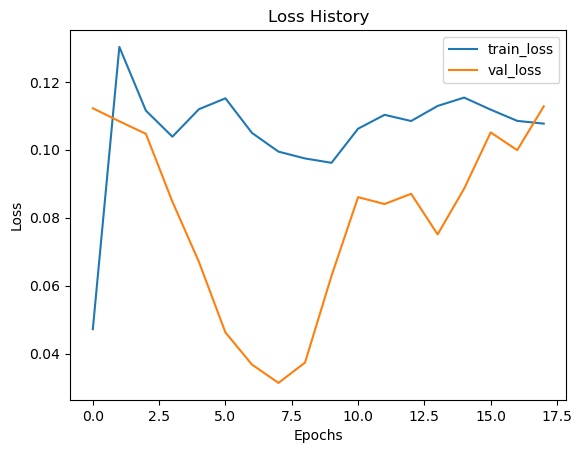

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

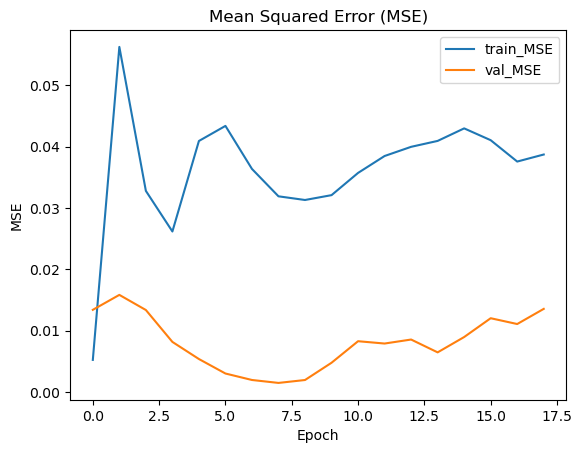

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

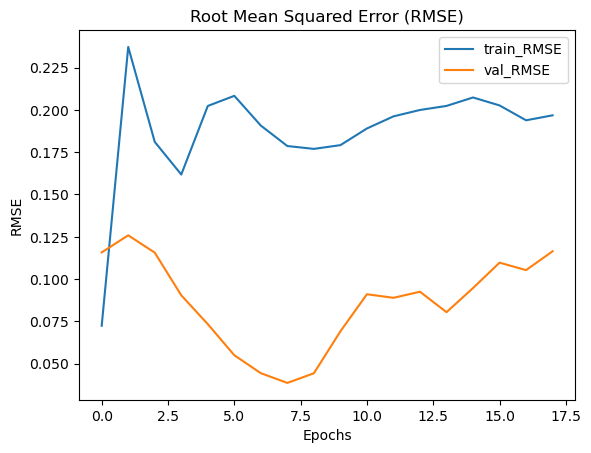

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

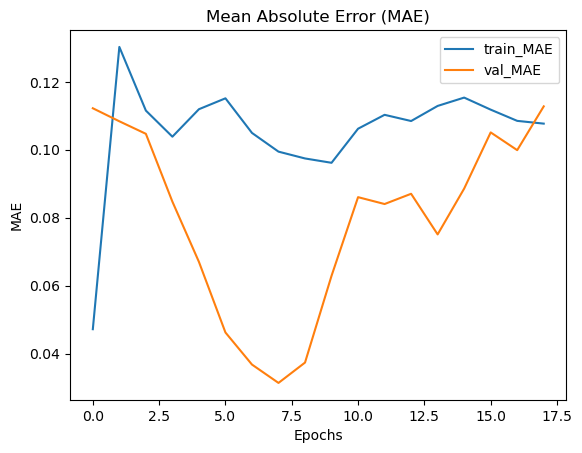

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

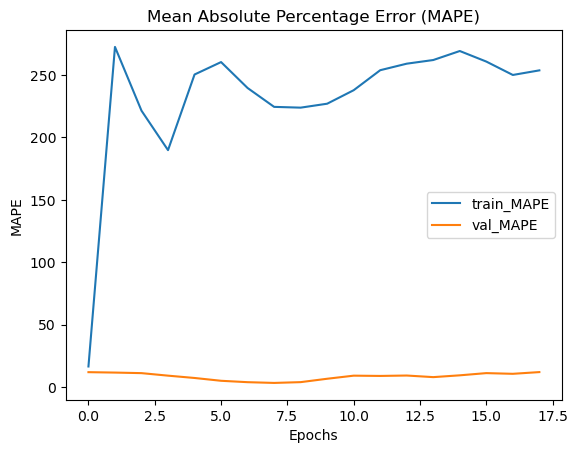

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:14:49.296319: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


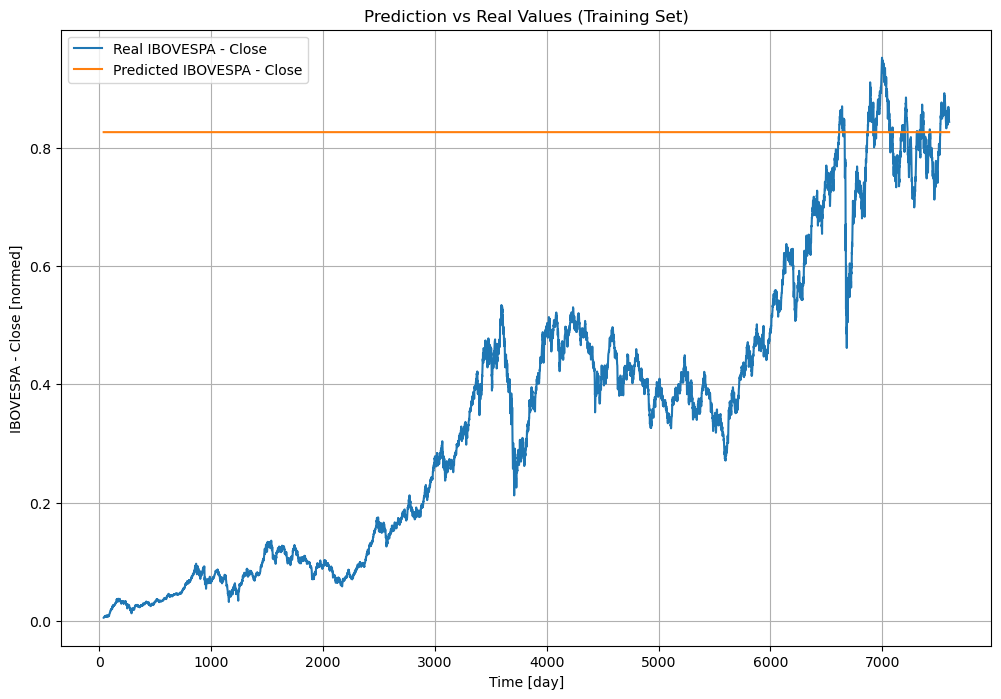

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


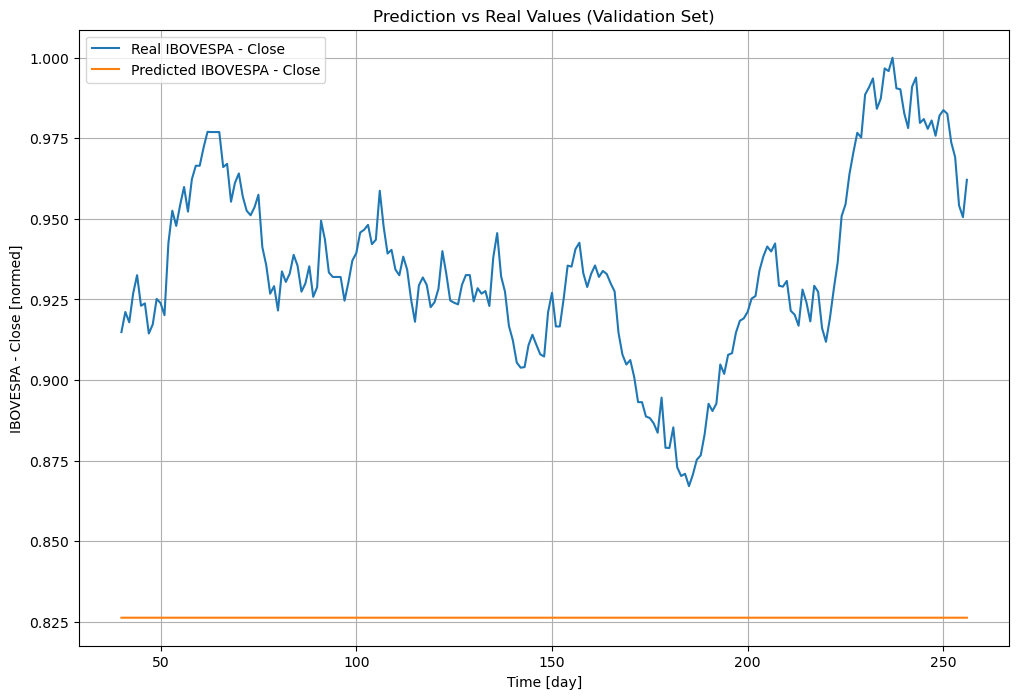

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


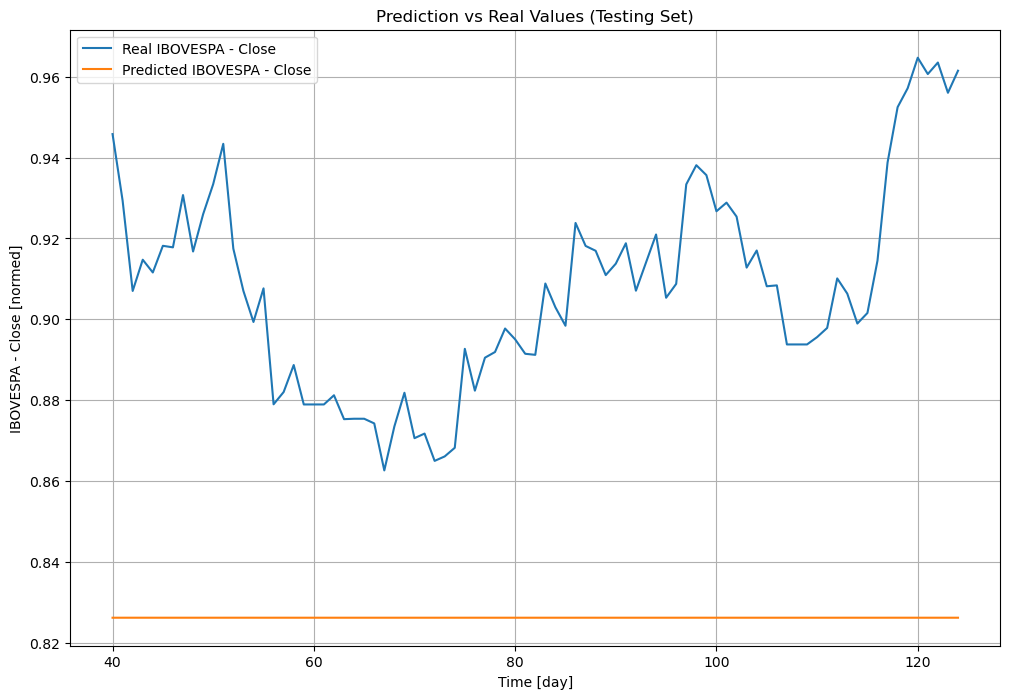

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

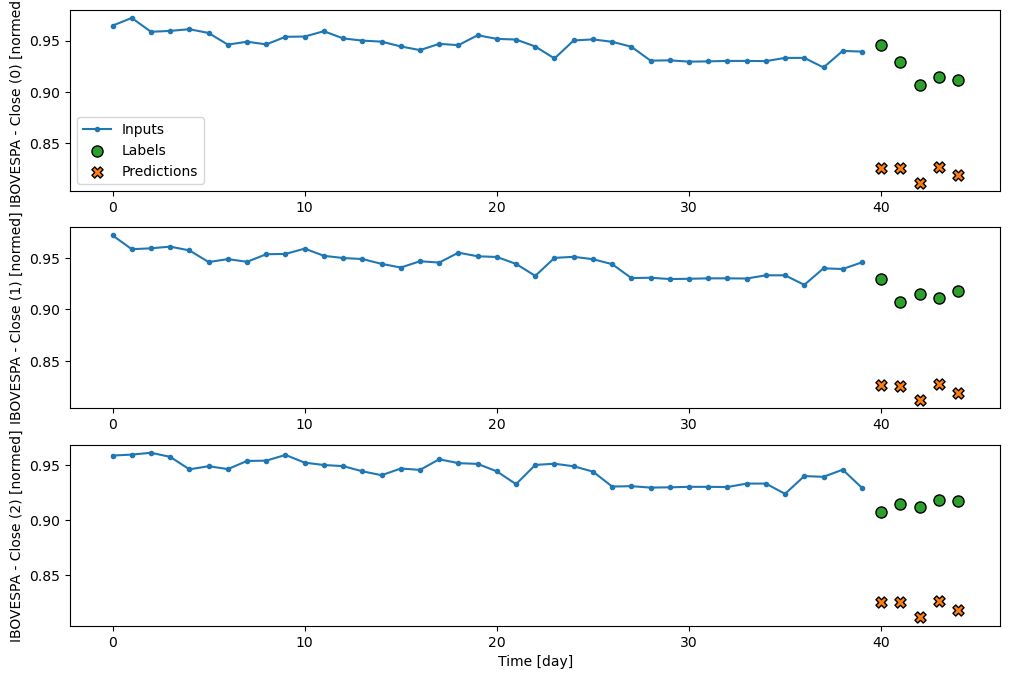

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:55s:18ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step


array([[[0.826241  , 0.826241  , 0.826241  , ..., 0.826241  ,
         0.826241  , 0.826241  ],
        [0.8259618 , 0.8259618 , 0.8259618 , ..., 0.8259618 ,
         0.8259618 , 0.8259618 ],
        [0.8119072 , 0.8119072 , 0.8119072 , ..., 0.8119072 ,
         0.8119072 , 0.8119072 ],
        [0.82720995, 0.82720995, 0.82720995, ..., 0.82720995,
         0.82720995, 0.82720995],
        [0.81912404, 0.81912404, 0.81912404, ..., 0.81912404,
         0.8191242 , 0.8191242 ]],

       [[0.8262414 , 0.8262414 , 0.8262414 , ..., 0.8262414 ,
         0.8262414 , 0.8262414 ],
        [0.8259622 , 0.8259622 , 0.8259622 , ..., 0.8259622 ,
         0.8259622 , 0.8259622 ],
        [0.81190765, 0.81190765, 0.81190765, ..., 0.81190765,
         0.81190765, 0.81190765],
        [0.82721025, 0.82721025, 0.82721025, ..., 0.82721025,
         0.82721025, 0.82721025],
        [0.8191242 , 0.8191242 , 0.8191242 , ..., 0.8191242 ,
         0.8191244 , 0.8191244 ]],

       [[0.82624185, 0.82624185, 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')